In [42]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import random

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

onefig_size = (10,4)
multifigs_size = (12,4)



```
# This is formatted as code
```

## Dataset Overview

In [43]:
!unzip /content/Mental_Health_Dataset.zip

Archive:  /content/Mental_Health_Dataset.zip
  inflating: Deepression.csv         


This dataset contains survey responses from patients regarding various symptoms associated with depression. Each patient answered 14 questions, and the responses are coded from 1 to 6 based on the frequency of experiencing each symptom. Additionally, the dataset includes a column indicating the patient's overall depression state.

In [44]:
original_df = pd.read_csv('Deepression.csv')
original_df.head()

,Number,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,Mild
1,2,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate
2,3,5.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,Severe
3,4,1.0,1.0,1.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,No depression
4,5,2.0,5.0,5.0,1.0,1.0,5.0,1.0,1.0,5.0,1.0,1.0,1.0,1.0,1.0,Moderate


#Dropping patients ids due to the absence of relevance for training and **EDA**

In [45]:
original_df.drop("Number ", axis=1, inplace=True)

In [46]:
original_df.isna().sum()

Sleep                273
Appetite             273
Interest             273
Fatigue              273
Worthlessness        273
Concentration        273
Agitation            273
Suicidal Ideation    273
Sleep Disturbance    273
Aggression           273
Panic Attacks        273
Hopelessness         273
Restlessness         273
Low Energy           273
Depression State     273
dtype: int64

In [47]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813 entries, 0 to 812
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sleep              540 non-null    float64
 1   Appetite           540 non-null    float64
 2   Interest           540 non-null    float64
 3   Fatigue            540 non-null    float64
 4   Worthlessness      540 non-null    float64
 5   Concentration      540 non-null    float64
 6   Agitation          540 non-null    float64
 7   Suicidal Ideation  540 non-null    float64
 8   Sleep Disturbance  540 non-null    float64
 9   Aggression         540 non-null    float64
 10  Panic Attacks      540 non-null    float64
 11  Hopelessness       540 non-null    float64
 12  Restlessness       540 non-null    float64
 13  Low Energy         540 non-null    float64
 14  Depression State   540 non-null    object 
dtypes: float64(14), object(1)
memory usage: 95.4+ KB


In [48]:
original_df['Sleep'].unique()


array([ 1.,  2.,  5.,  6.,  3.,  4., nan])

In [49]:
original_df.dropna(inplace=True)


In [50]:
original_df['Sleep'].unique()


array([1., 2., 5., 6., 3., 4.])

In [51]:
original_df['Depression State'] = original_df['Depression State'].astype('object')
original_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540 entries, 0 to 539
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sleep              540 non-null    float64
 1   Appetite           540 non-null    float64
 2   Interest           540 non-null    float64
 3   Fatigue            540 non-null    float64
 4   Worthlessness      540 non-null    float64
 5   Concentration      540 non-null    float64
 6   Agitation          540 non-null    float64
 7   Suicidal Ideation  540 non-null    float64
 8   Sleep Disturbance  540 non-null    float64
 9   Aggression         540 non-null    float64
 10  Panic Attacks      540 non-null    float64
 11  Hopelessness       540 non-null    float64
 12  Restlessness       540 non-null    float64
 13  Low Energy         540 non-null    float64
 14  Depression State   540 non-null    object 
dtypes: float64(14), object(1)
memory usage: 67.5+ KB


In [52]:
original_df.describe()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy
count,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000,540.000000
mean,2.912963,2.777778,2.785185,2.964815,2.957407,2.777778,2.968519,2.964815,2.803704,2.979630,2.987037,2.964815,2.964815,2.924074
std,1.738417,1.675610,1.680998,1.727402,1.740077,1.673394,1.719939,1.733834,1.655481,1.721185,1.708274,1.723100,1.733834,1.727163
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
max,6.000000,5.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000


In [53]:
annotation = {1: "Never", 2: "Always",
              3: "Often", 4: "Rarely",
              5: "Sometimes", 6: "Not at all"}

reverse_annotation = dict()

for i, j in annotation.items():
    reverse_annotation[j] = i

In [54]:
for i in original_df.columns[:-1]:
    original_df[i] = original_df[i].astype(int)

# Annotating labels to their real values for EDA insights

In [55]:
for i in original_df.columns[:-1]:
    original_df[i] = original_df[i].map(annotation)

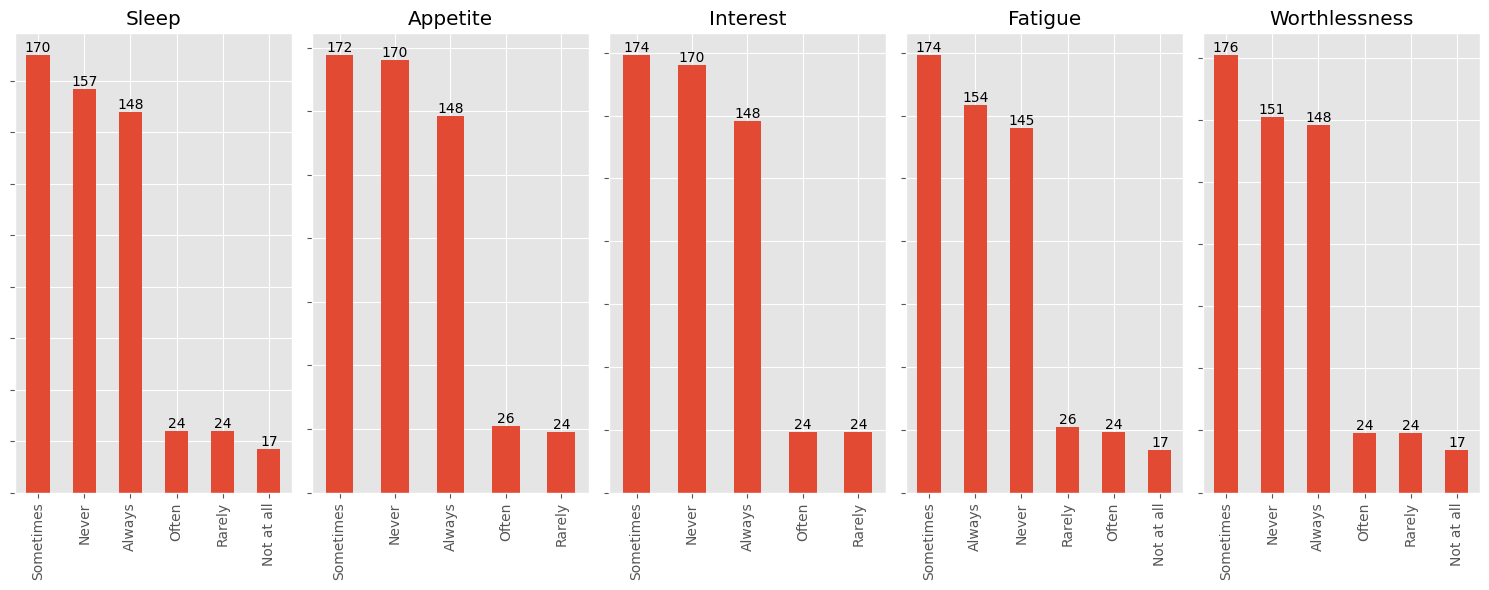

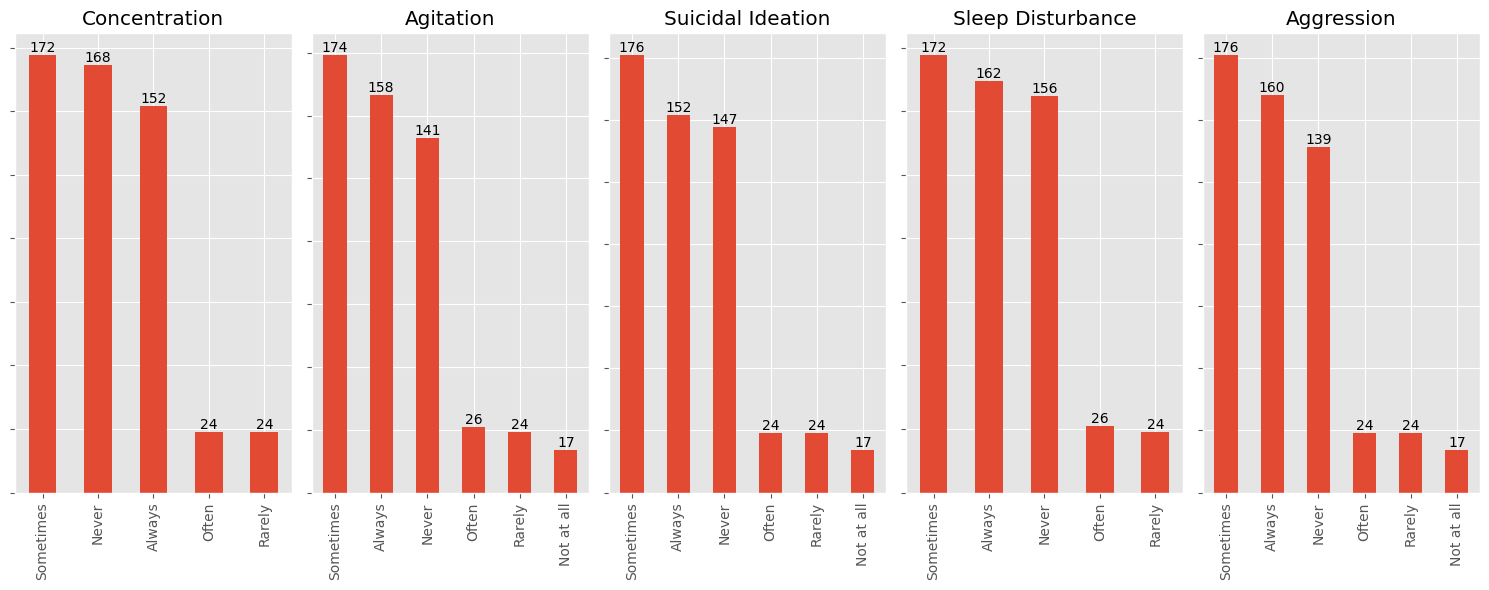

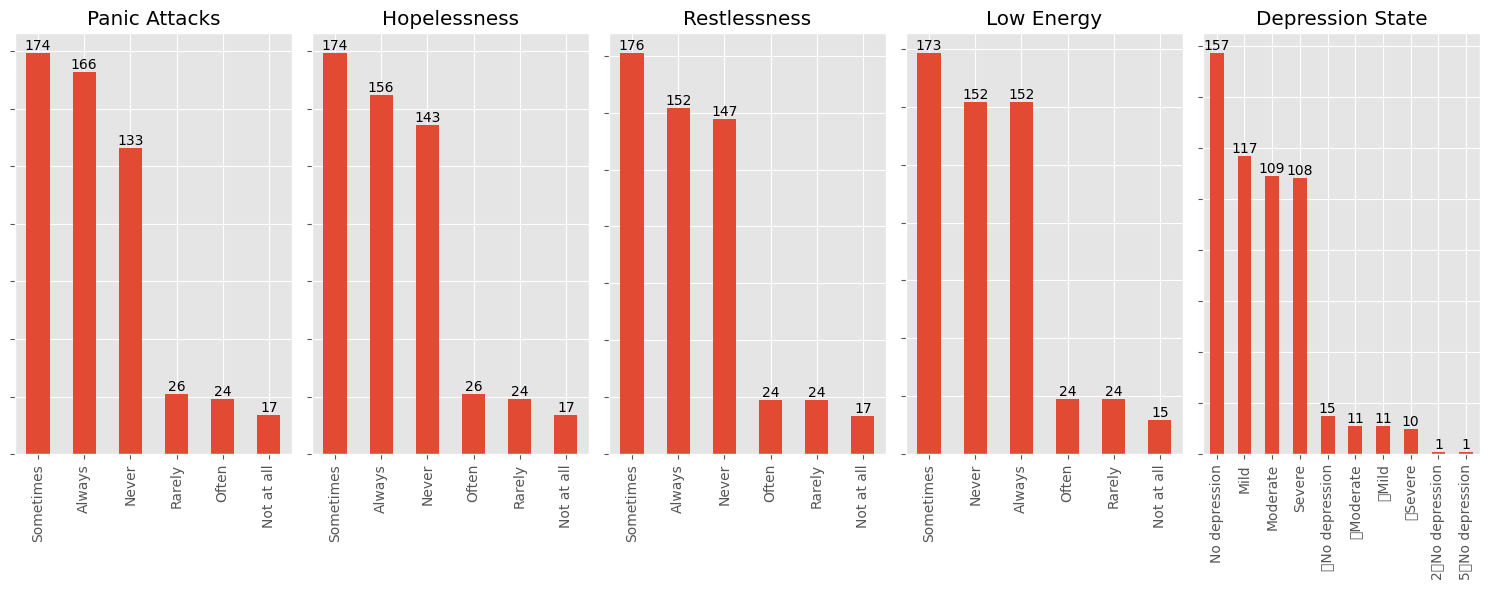

In [56]:
index = 0
for i in range(3):
    fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 6))
    for j in range(5):
        count = original_df[original_df.columns[index]].value_counts()
        count.plot(kind="bar", ax=axes[j])
        for container in axes[j].containers:
            axes[j].bar_label(container)
        axes[j].set_yticklabels(())
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        axes[j].set_title(original_df.columns[index])
        index += 1
    plt.tight_layout()
    plt.show()

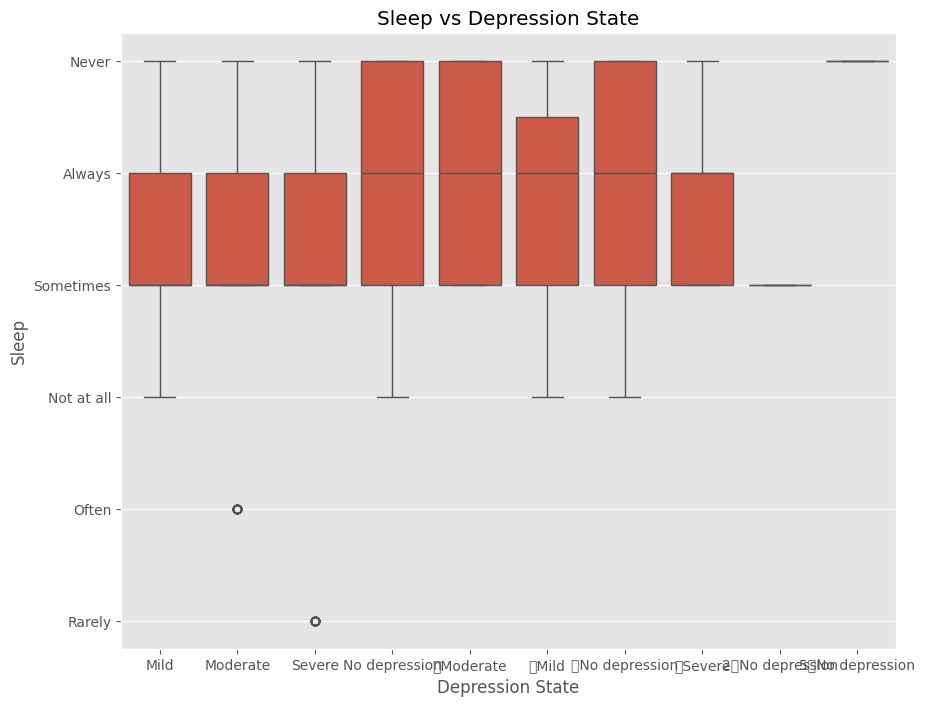

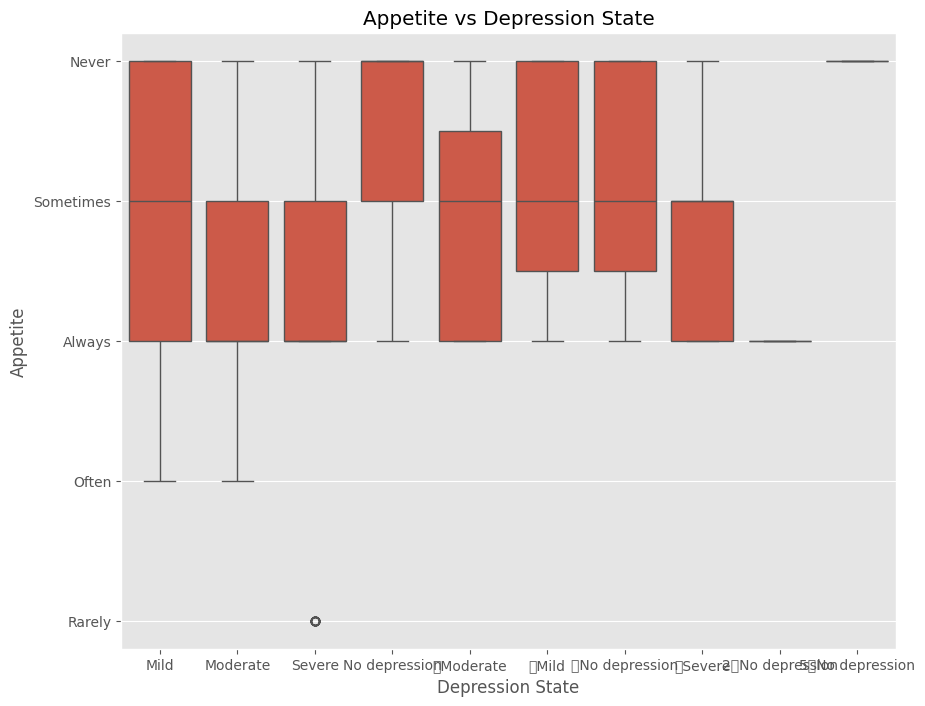

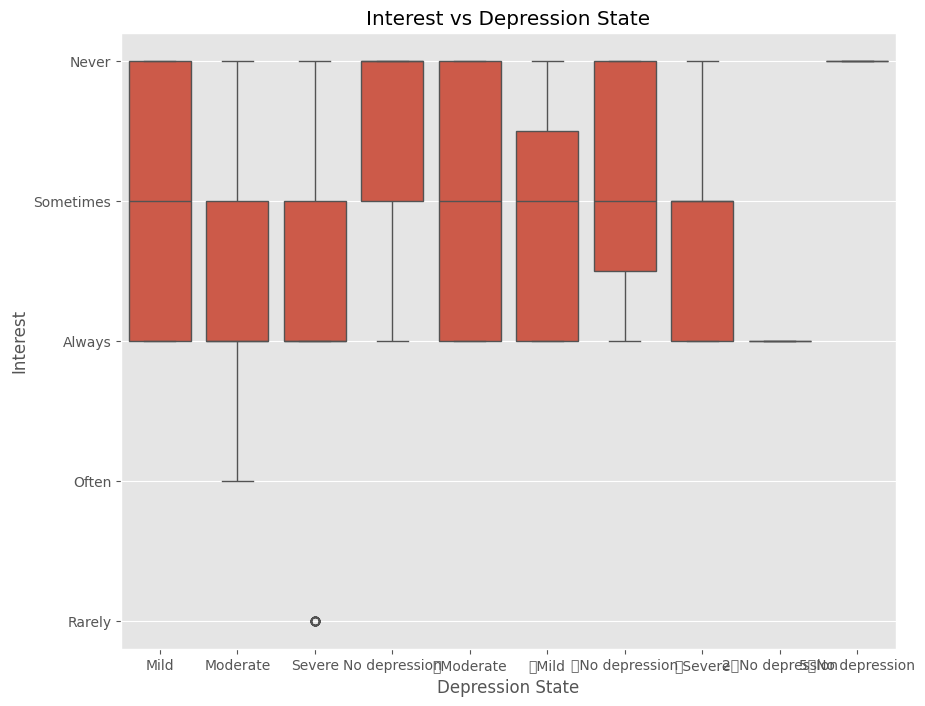

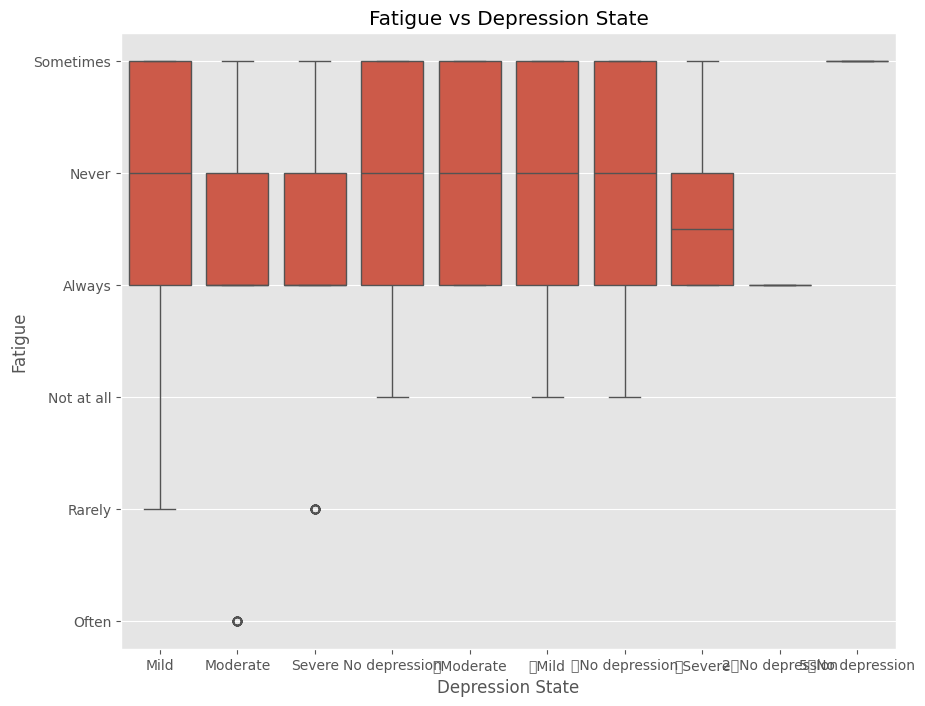

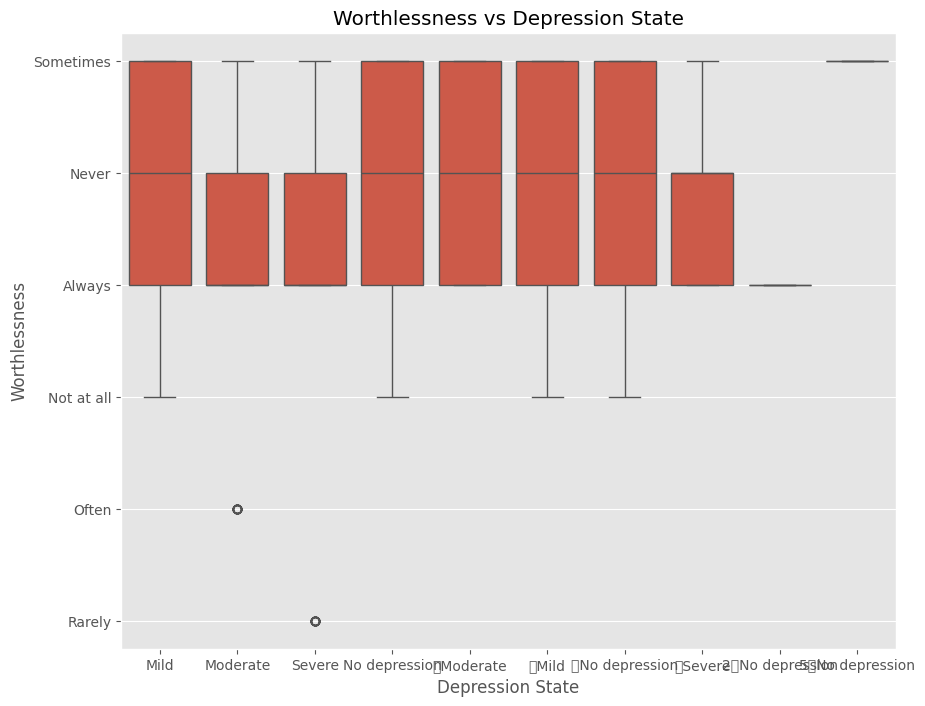

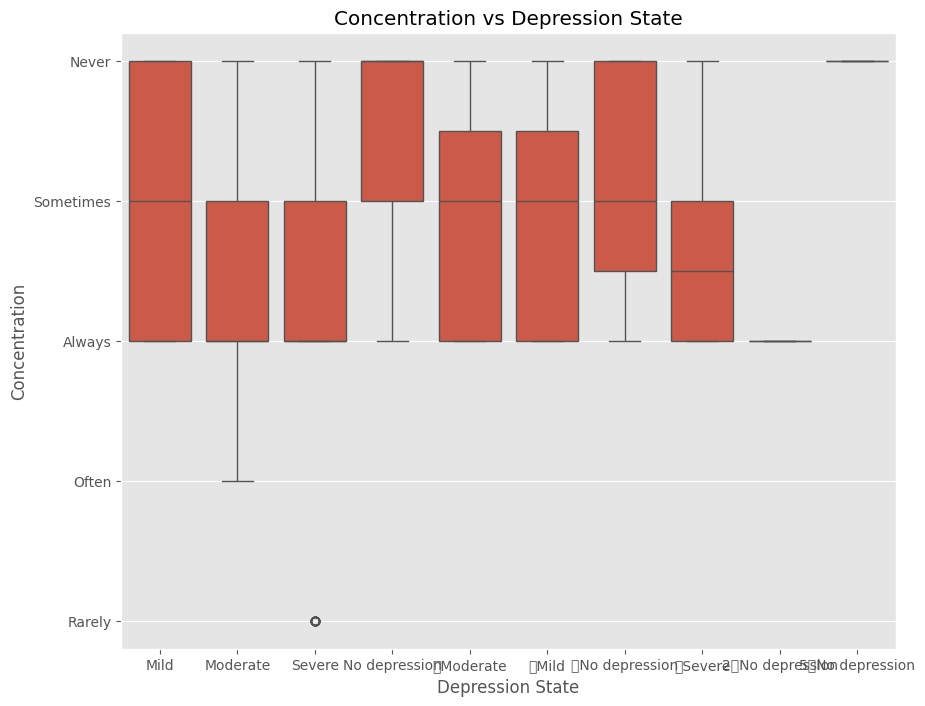

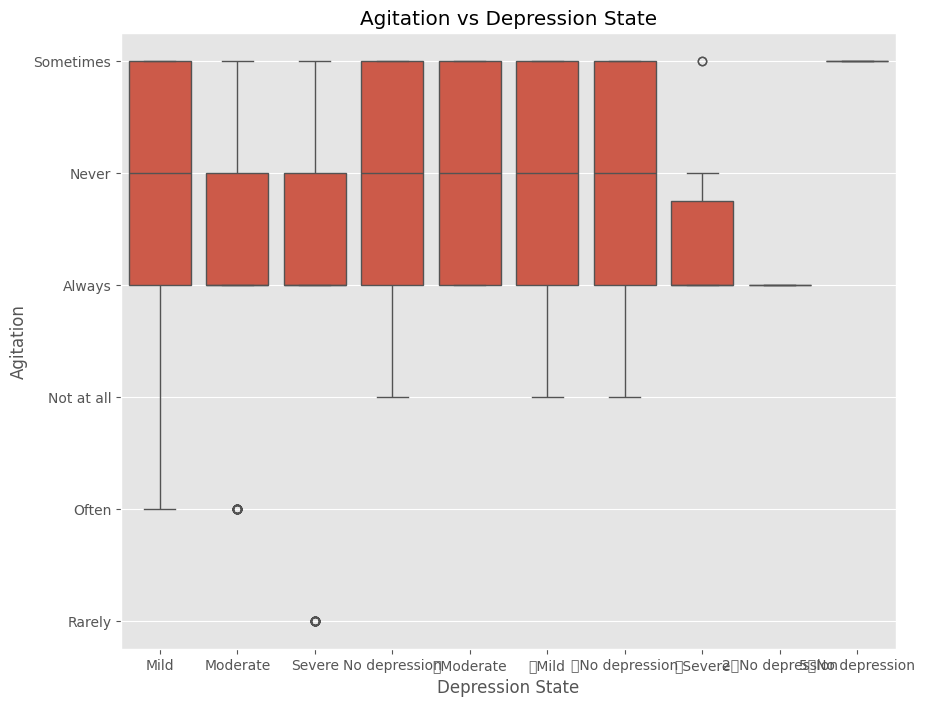

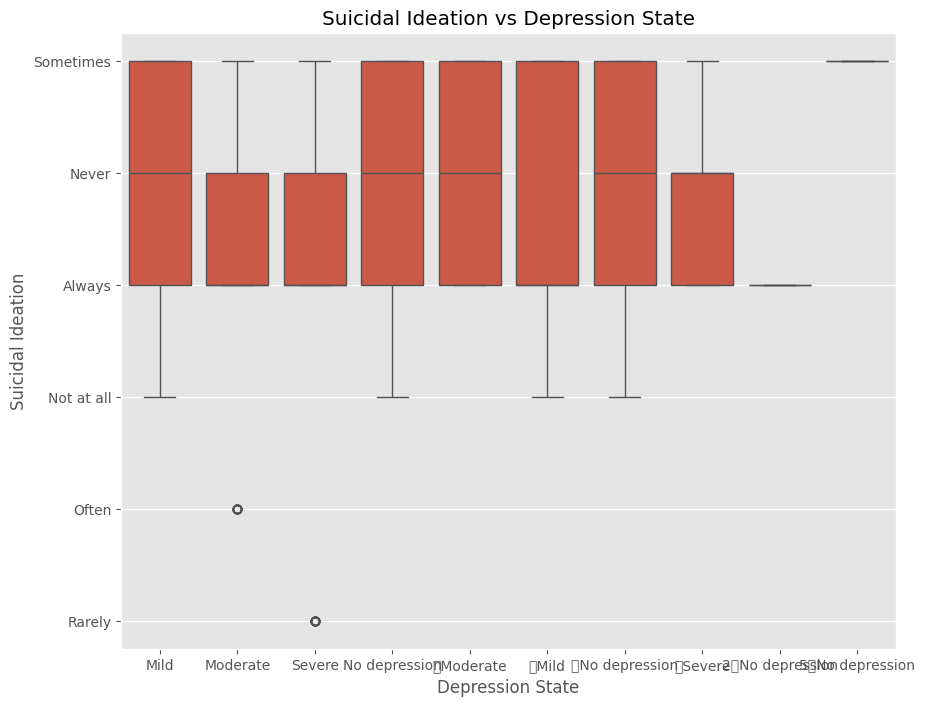

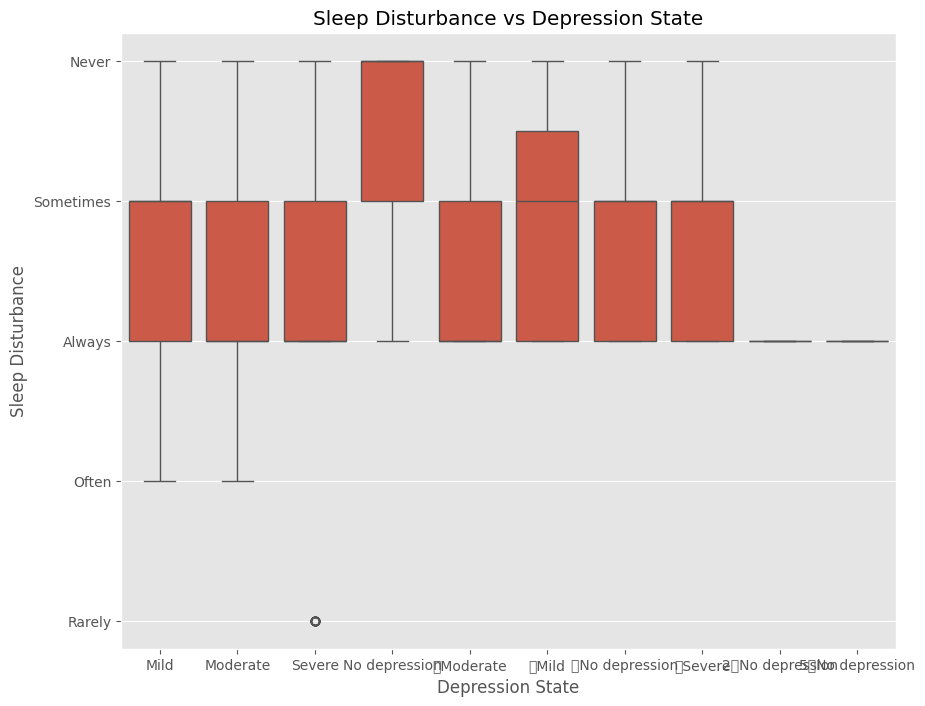

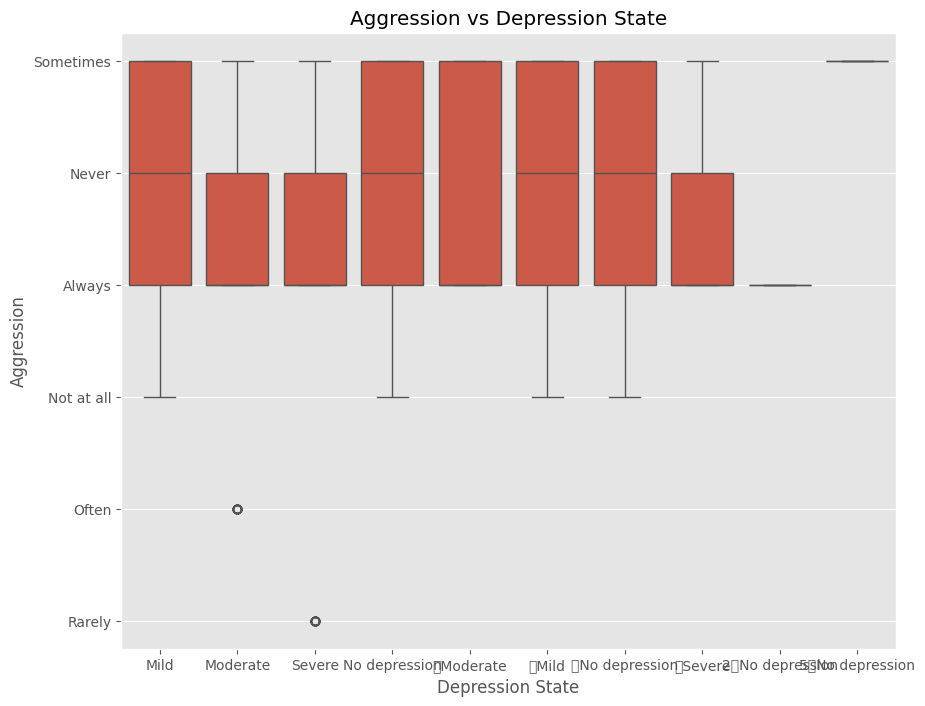

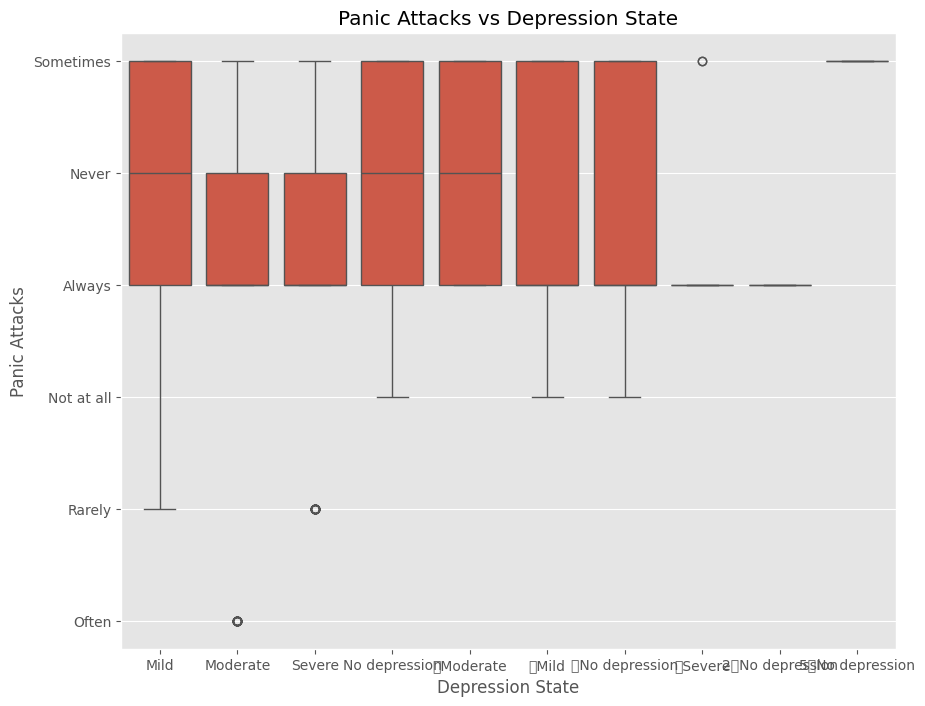

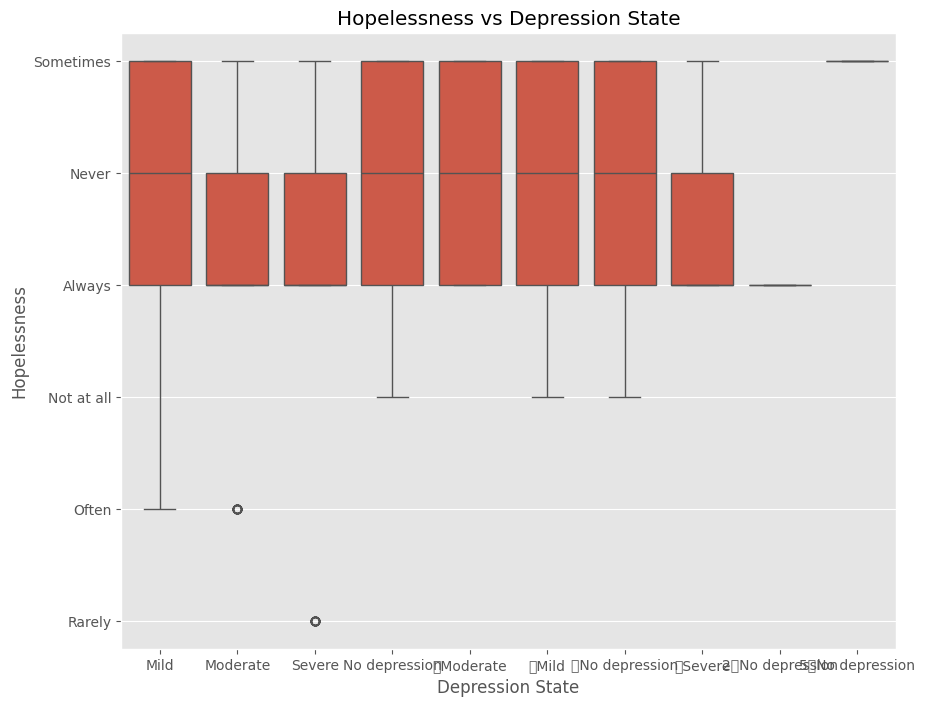

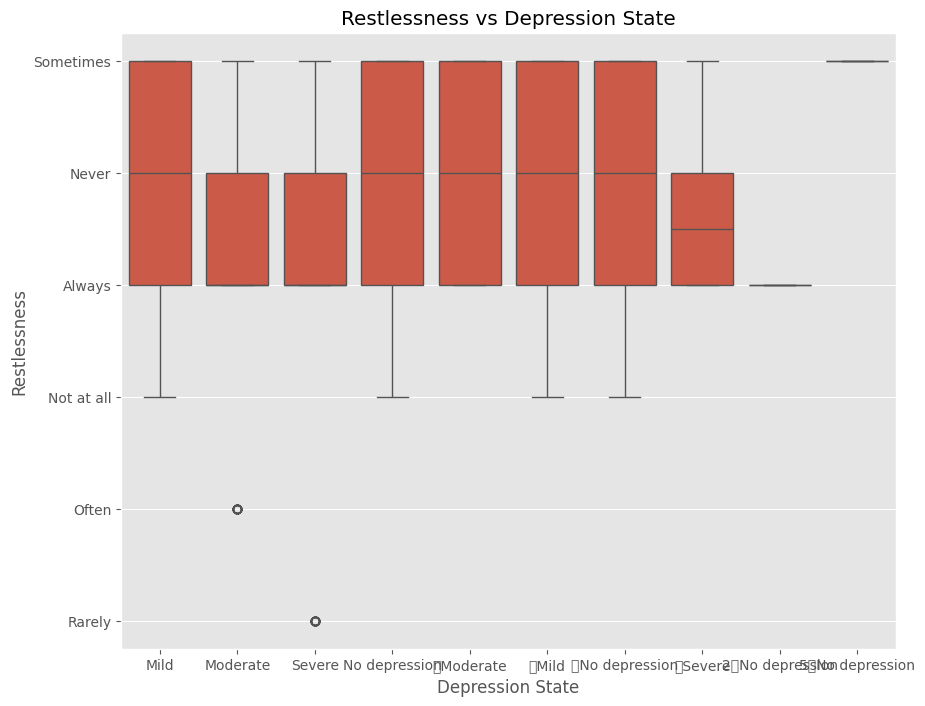

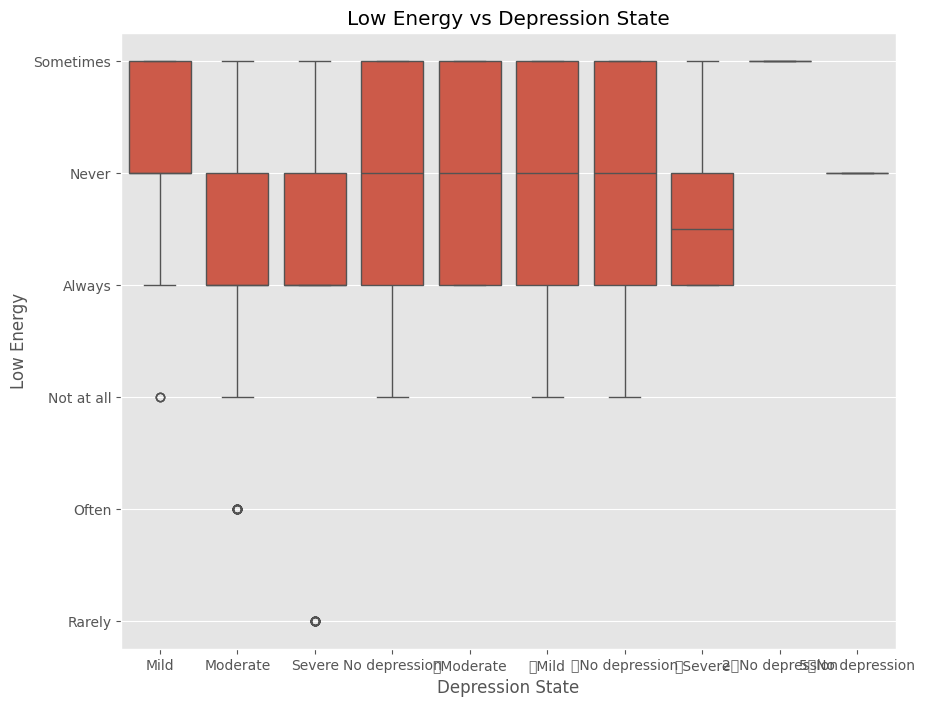

In [57]:
for column in original_df.columns[:-1]:  # Excluding 'Depression State'
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Depression State', y=column, data=original_df)
    plt.title(f'{column} vs Depression State')
    plt.show()

Counting unique values

In [58]:
original_df['Depression State'].value_counts()


Depression State
No depression       157
Mild                117
Moderate            109
Severe              108
\tNo depression      15
\tModerate           11
\tMild               11
\tSevere             10
2\tNo depression      1
5\tNo depression      1
Name: count, dtype: int64

## Data Cleaning


In [59]:
def mapping(x):
    if "No depression" in x:
        return "No depression"
    if "Mild" in x:
        return "Mild"
    if "Severe" in x:
        return "Severe"
    if "Moderate" in x:
        return "Moderate"

original_df["Depression State"] = original_df["Depression State"].apply(mapping)

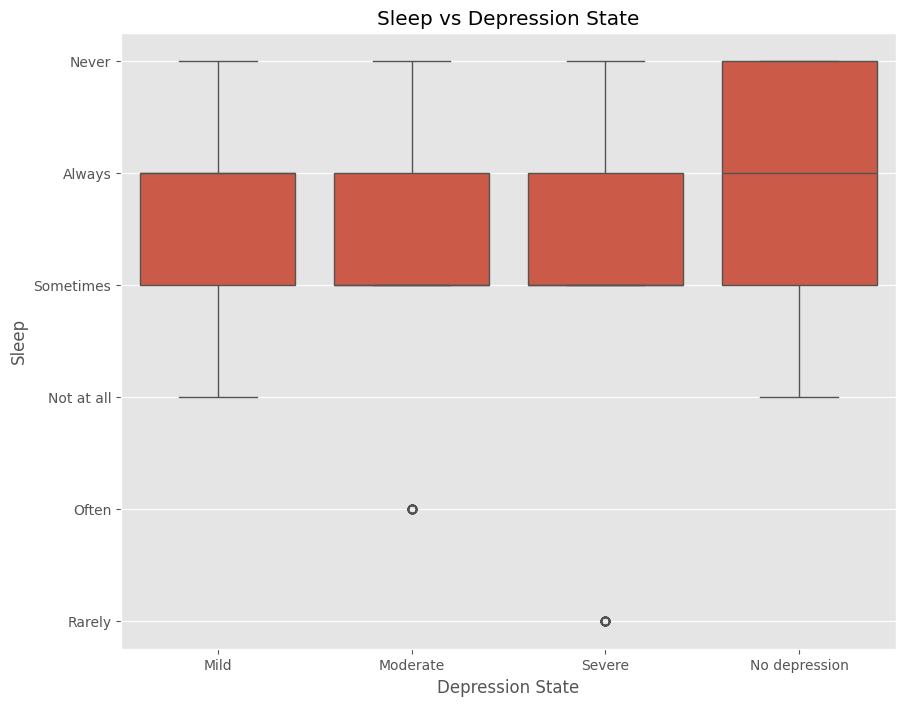

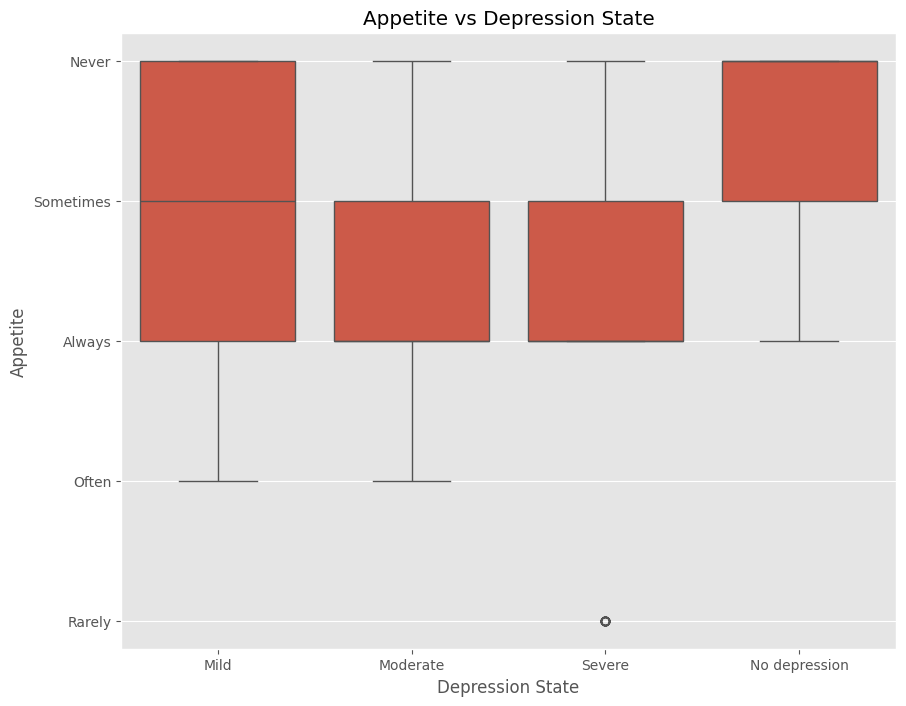

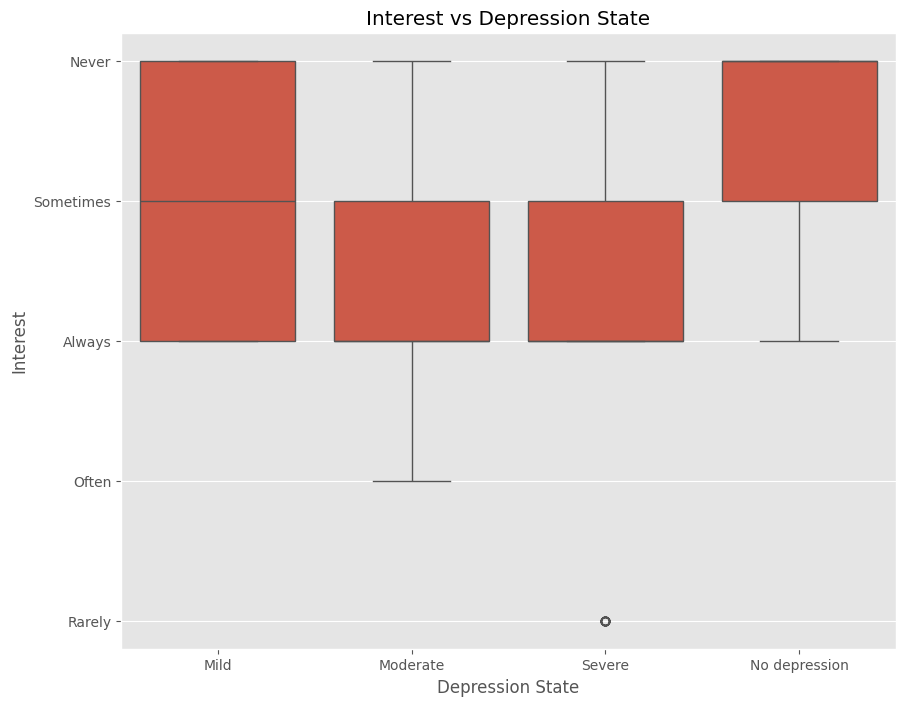

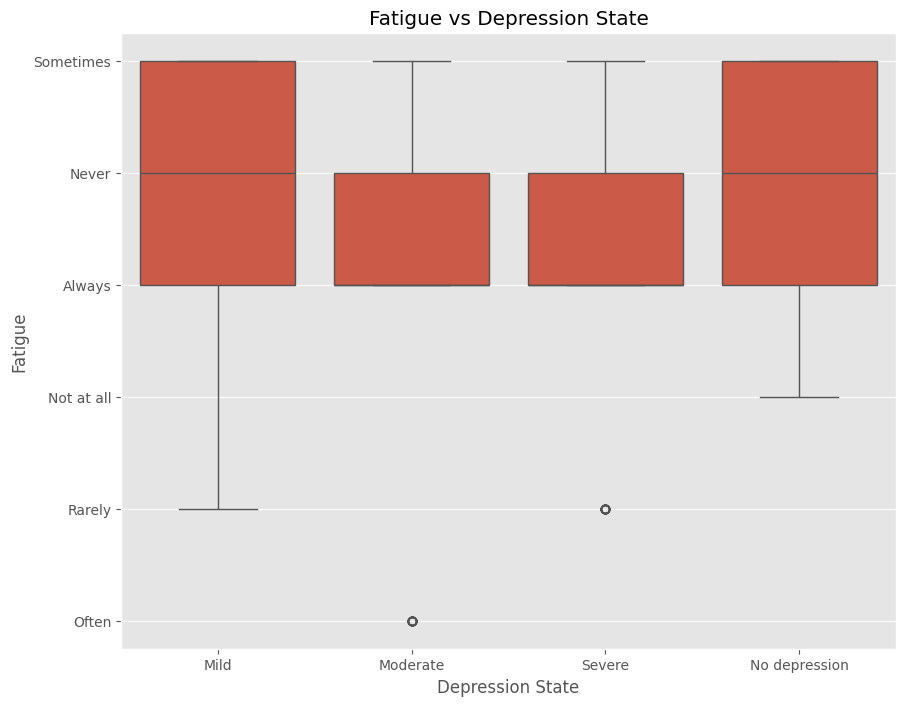

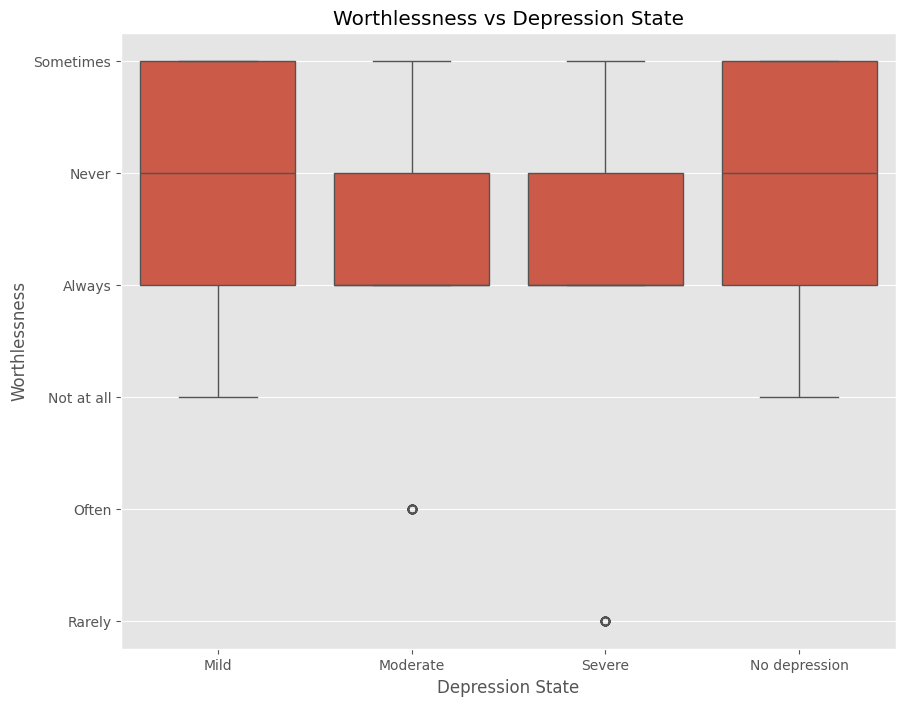

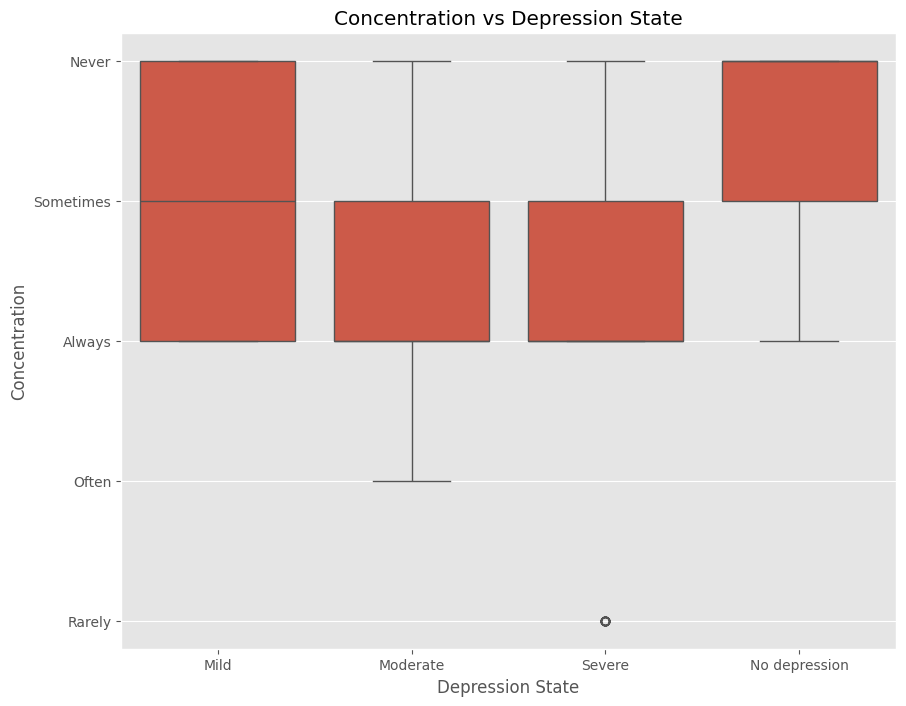

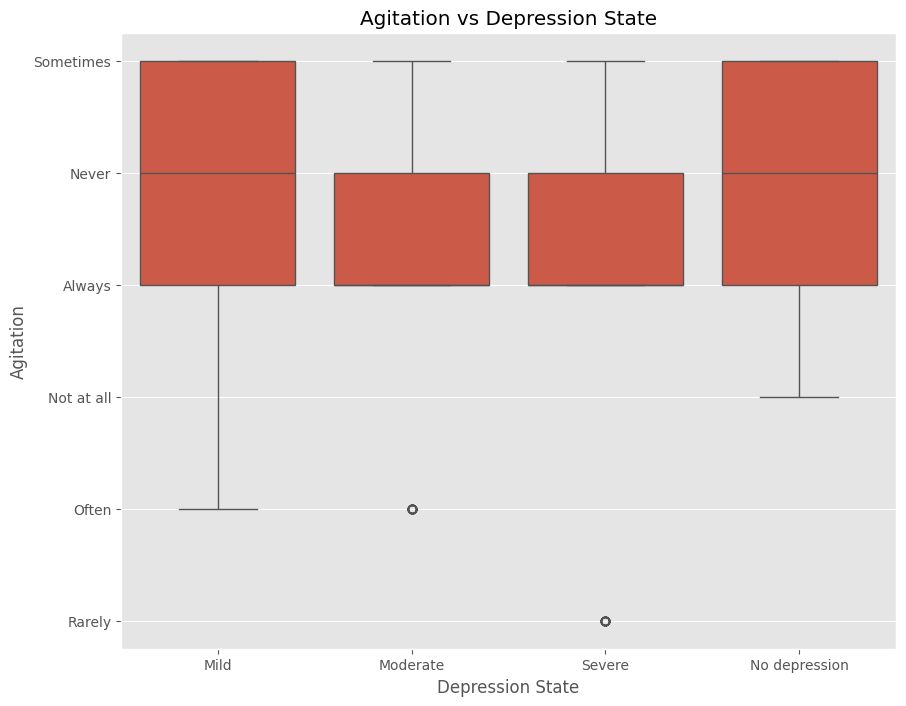

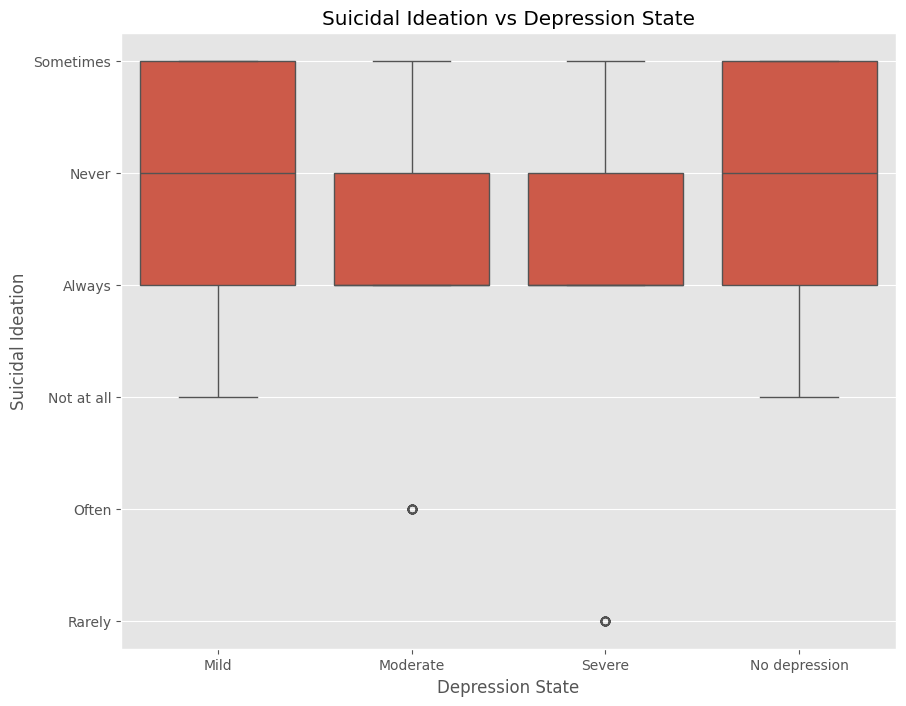

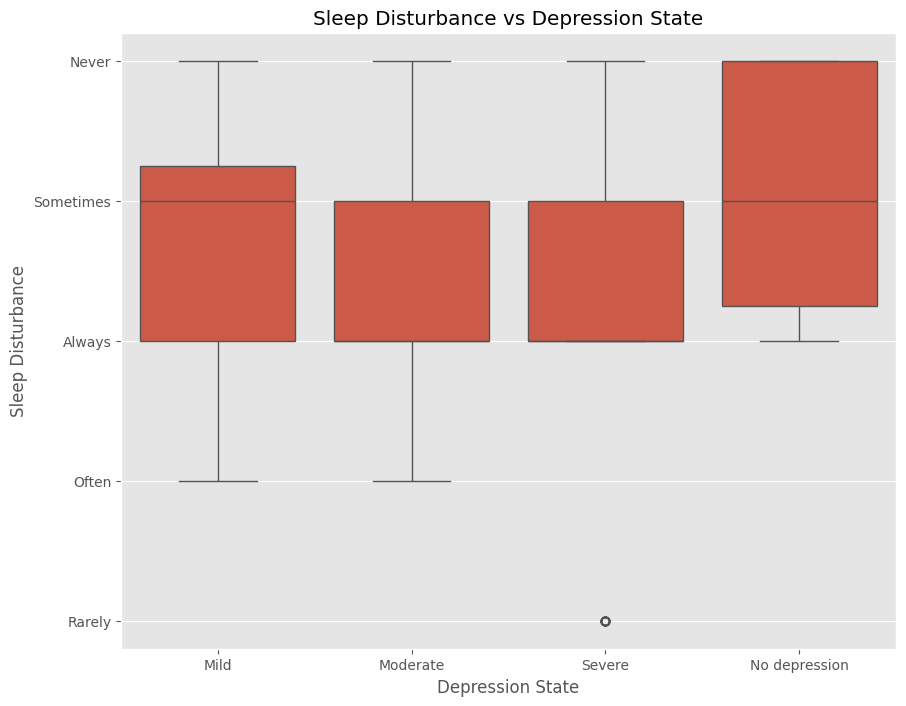

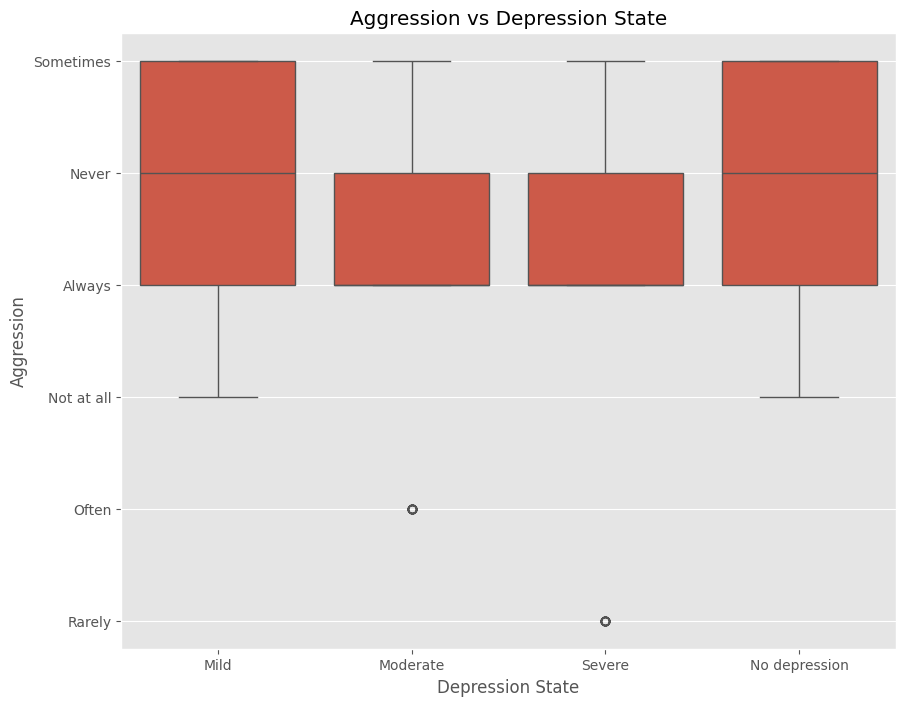

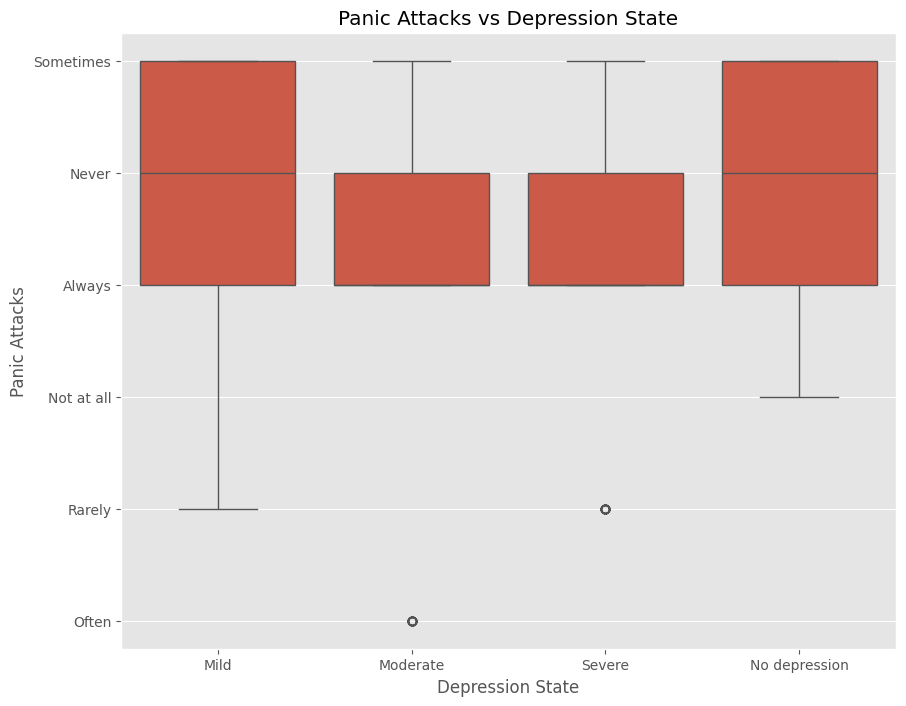

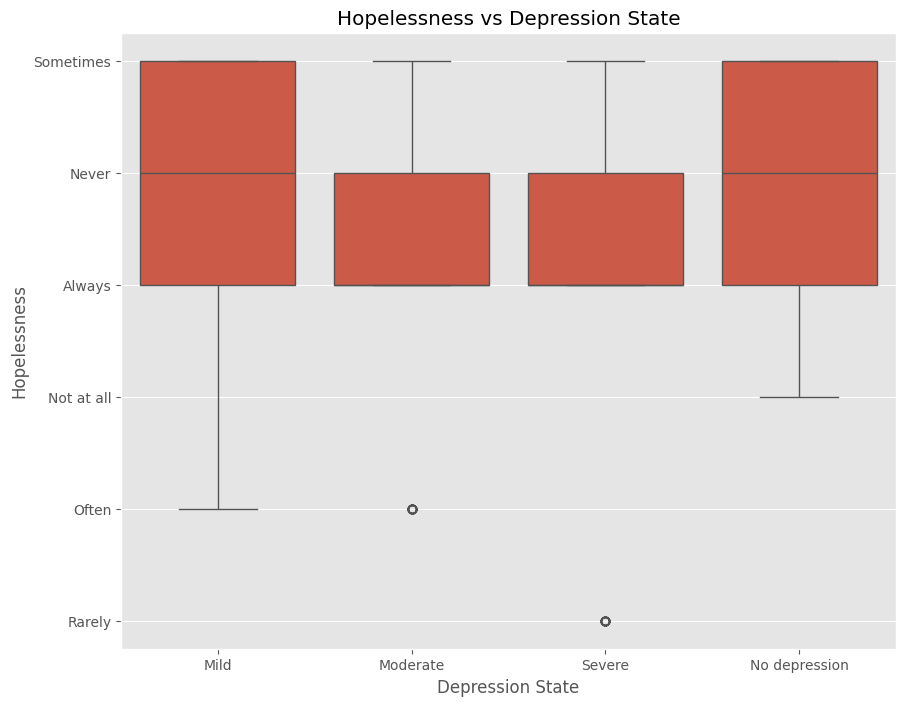

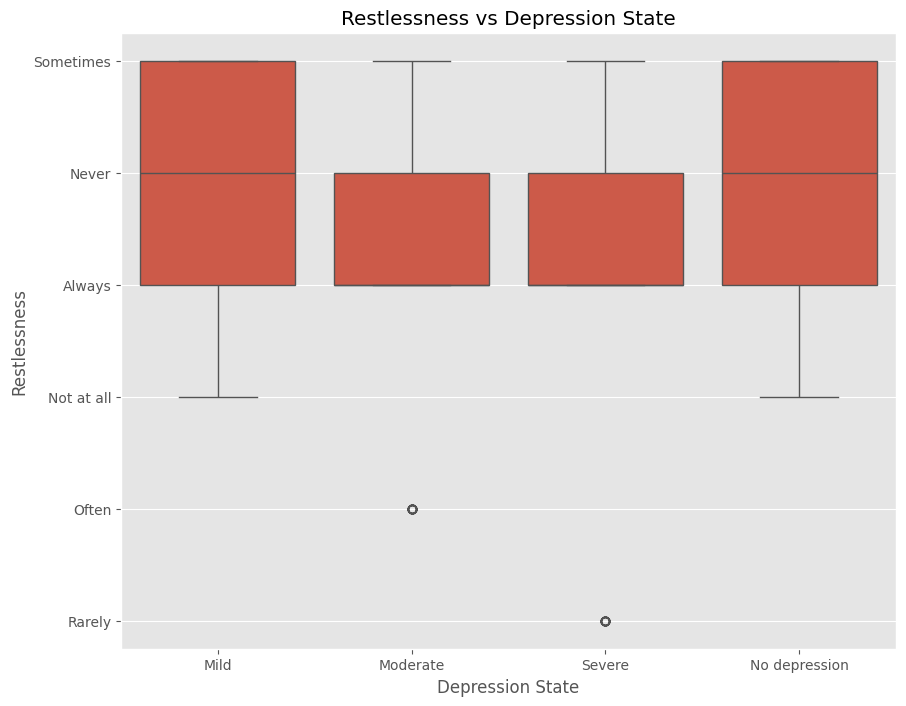

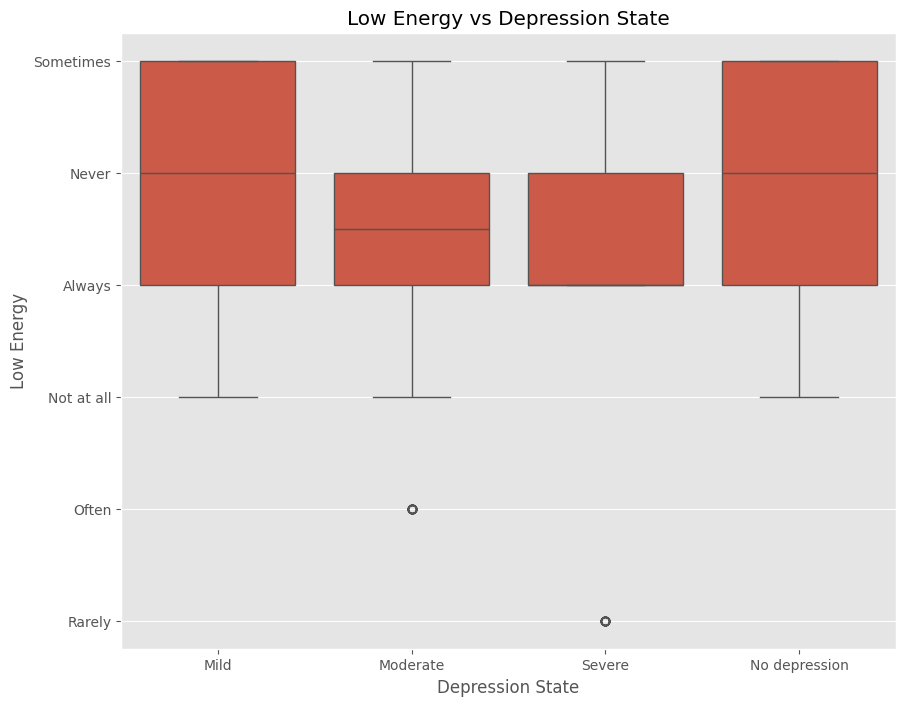

In [60]:
for column in original_df.columns[:-1]:  # Excluding 'Depression State'
    plt.figure(figsize=(10, 8))
    sns.boxplot(x='Depression State', y=column, data=original_df)
    plt.title(f'{column} vs Depression State')
    plt.show()

In [61]:
original_df['Depression State'].value_counts()

Depression State
No depression    174
Mild             128
Moderate         120
Severe           118
Name: count, dtype: int64

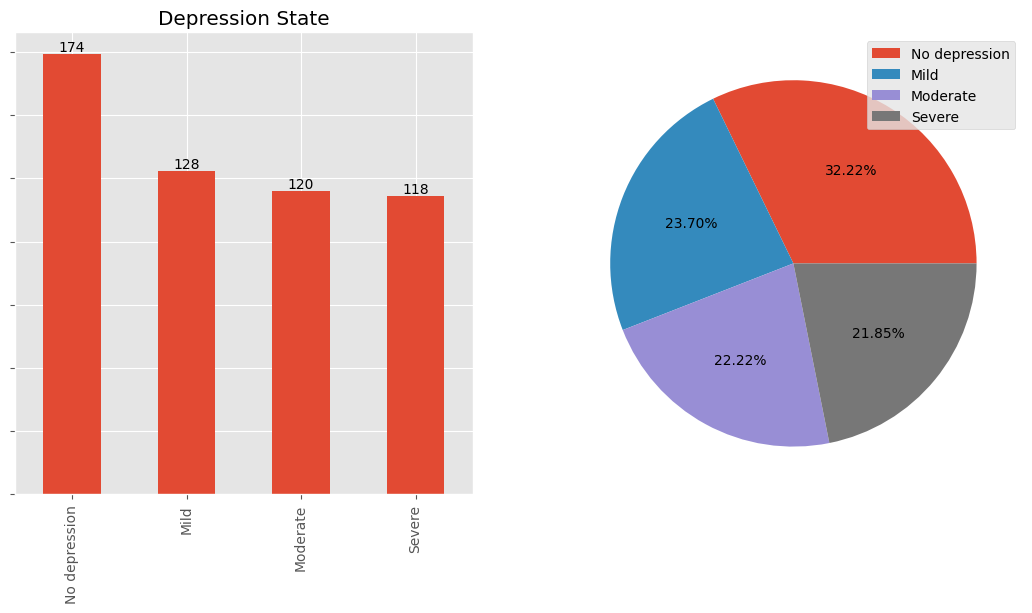

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13, 6))
counts = original_df[original_df.columns[-1]].value_counts()
counts.plot(kind="bar", ax=axes[0])
for container in axes[0].containers:
    axes[0].bar_label(container)
axes[0].set_yticklabels(())
axes[0].set_ylabel("")
axes[0].set_xlabel("")
axes[0].set_title(original_df.columns[-1])

axes[1].pie(counts, autopct="%0.2f%%")
axes[1].legend(counts.index)
axes[1].set_yticklabels(())
axes[1].set_xticklabels(())
axes[1].set_ylabel("")
axes[1].set_xlabel("")


plt.show()

In [63]:
crosstabs = dict()

for i in original_df.columns[:-1]:
    crosstabs[i] = pd.crosstab(original_df[i], original_df[original_df.columns[-1]])

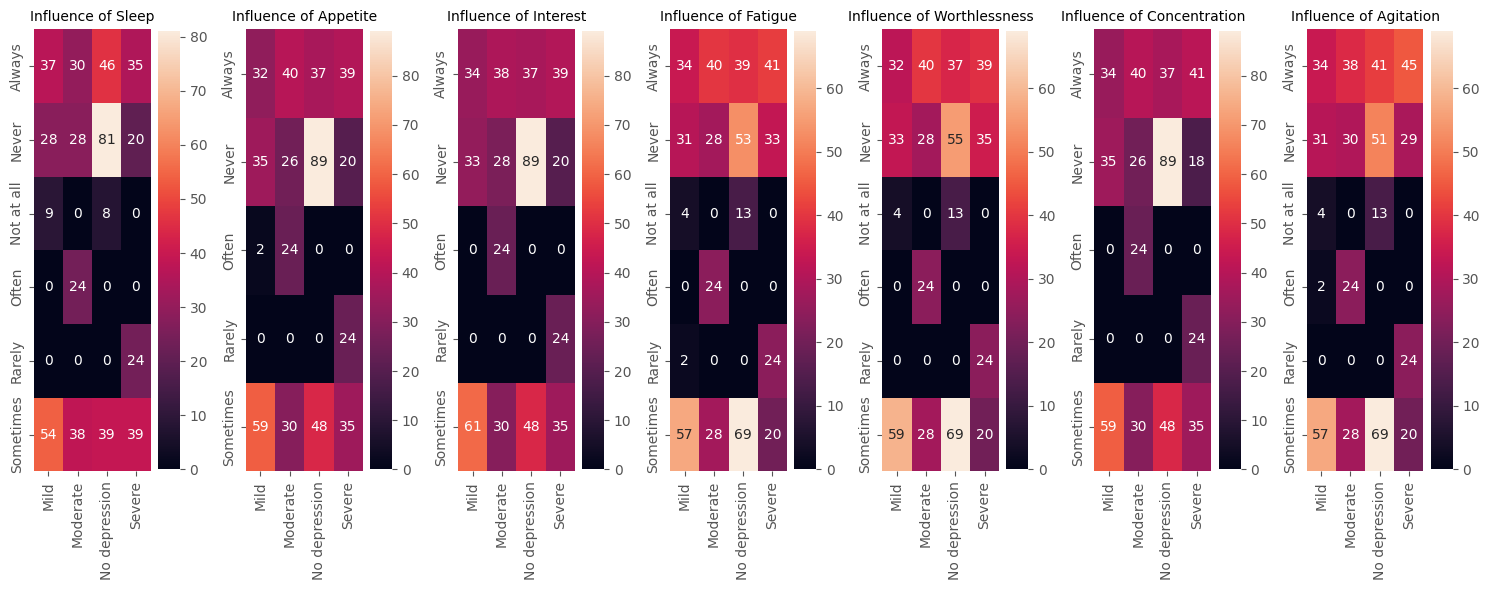

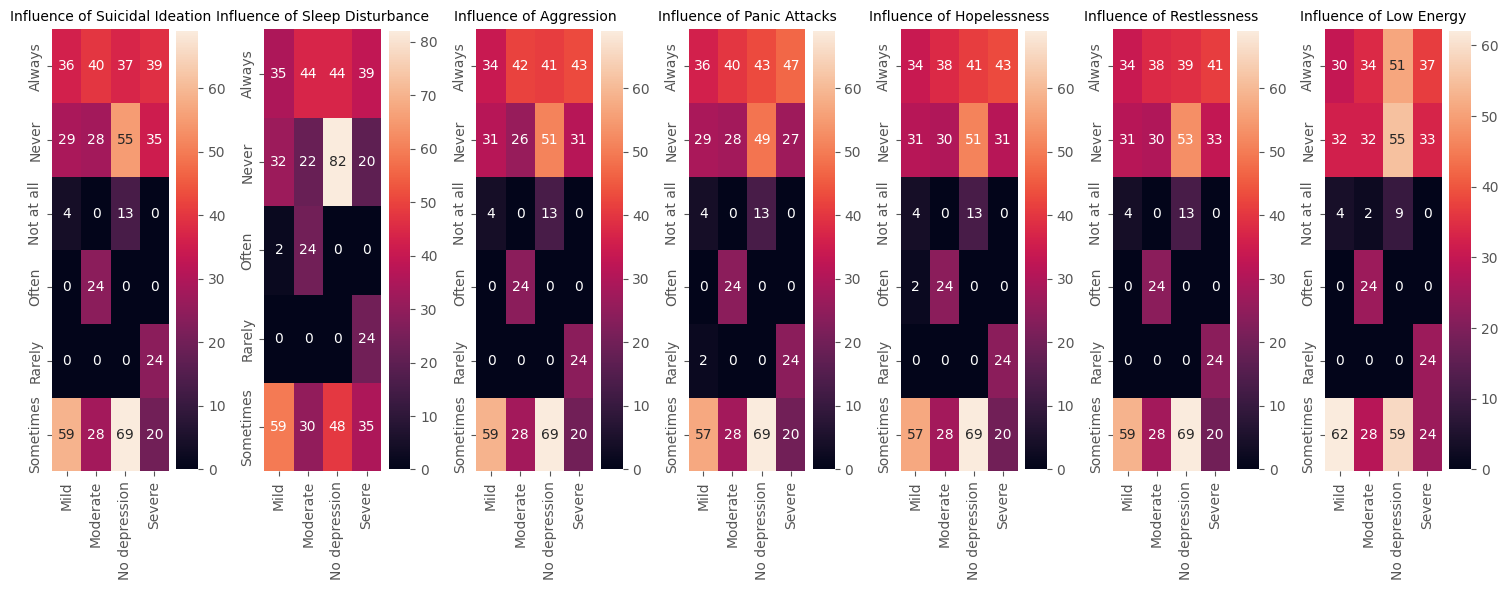

In [64]:
index = 0

for i in range(2):
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
    for j in range(7):
        sns.heatmap(crosstabs[original_df.columns[index]], annot=True, fmt='d', ax=axes[j])
        axes[j].set_title("Influence of {}".format(original_df.columns[index]), size=10)
        axes[j].set_ylabel("")
        axes[j].set_xlabel("")
        index += 1
    plt.tight_layout()
    plt.show()

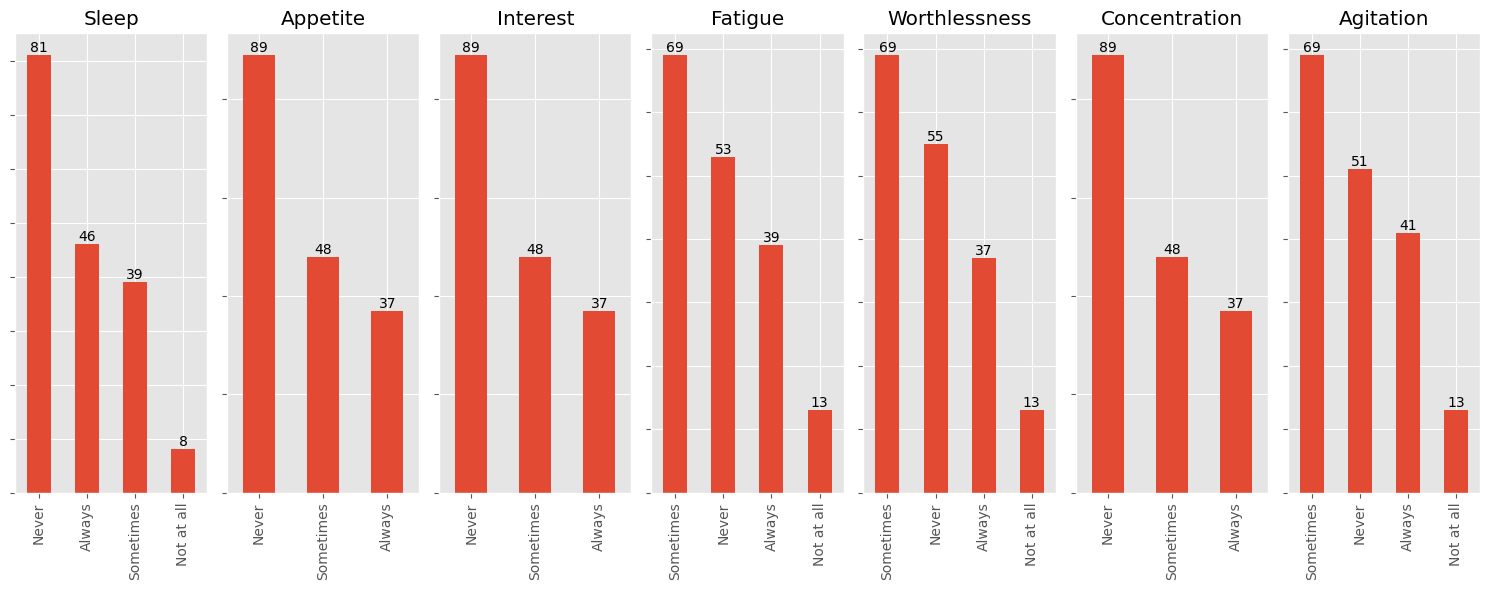

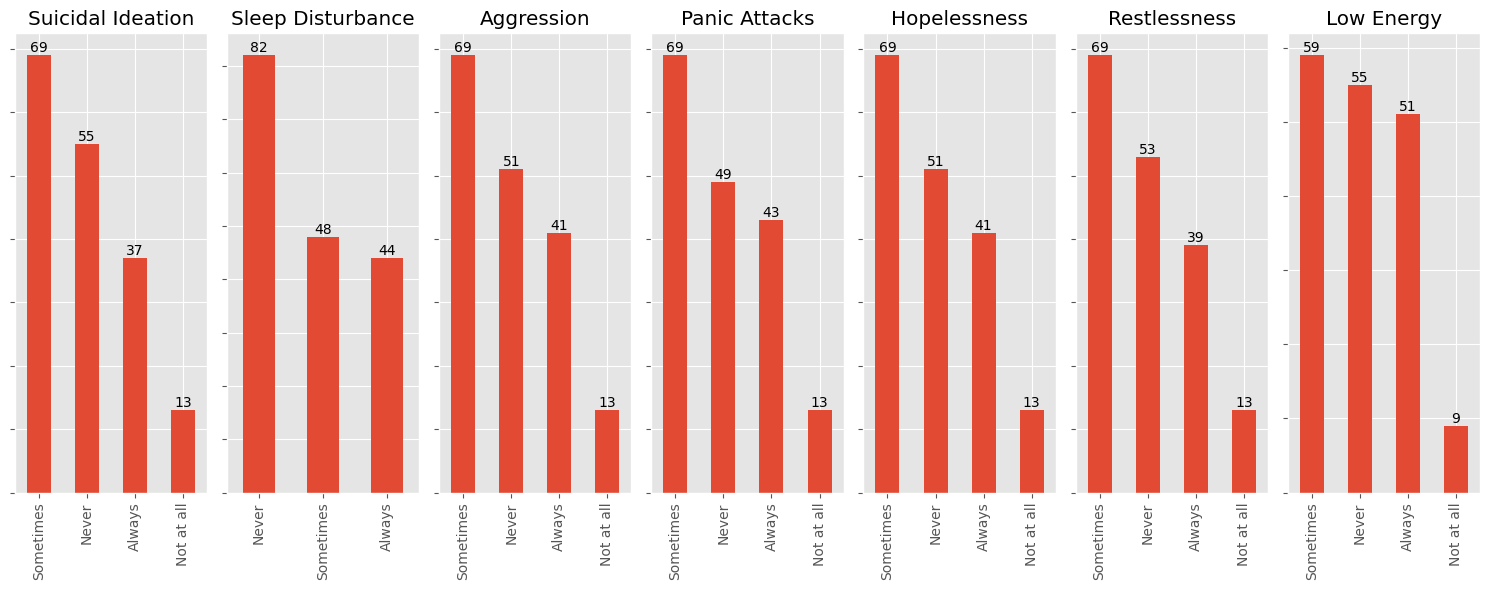

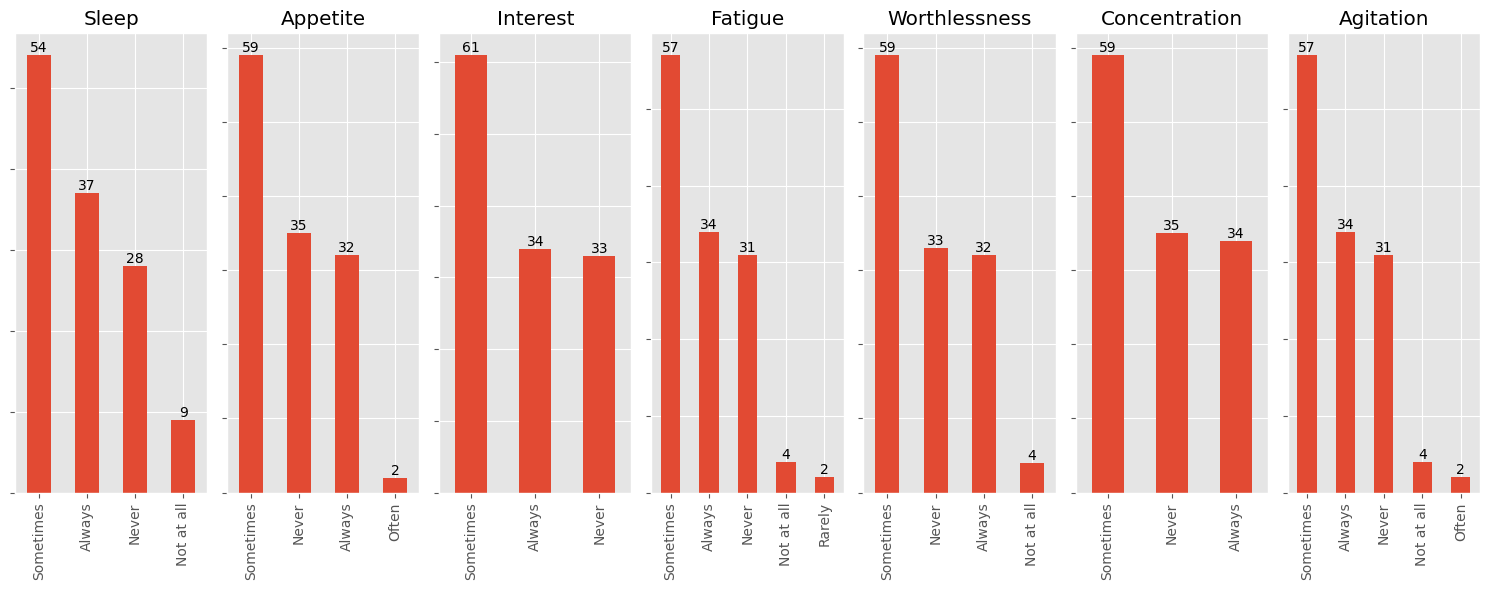

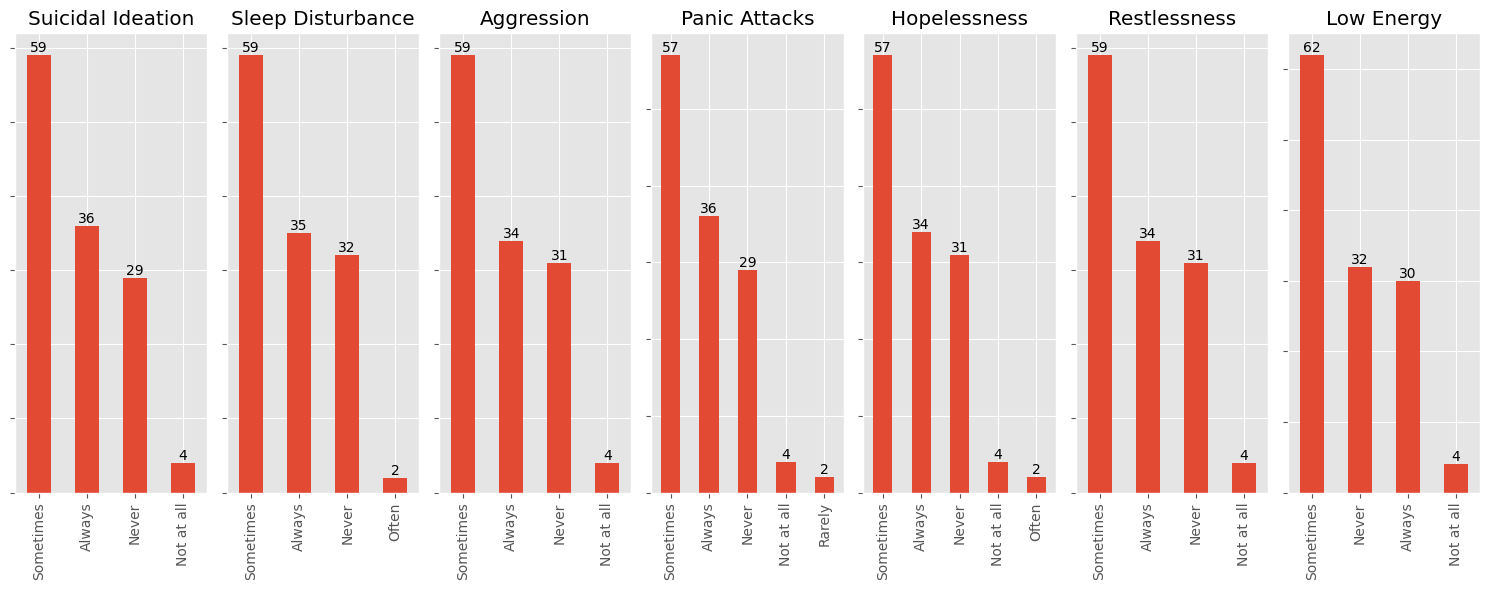

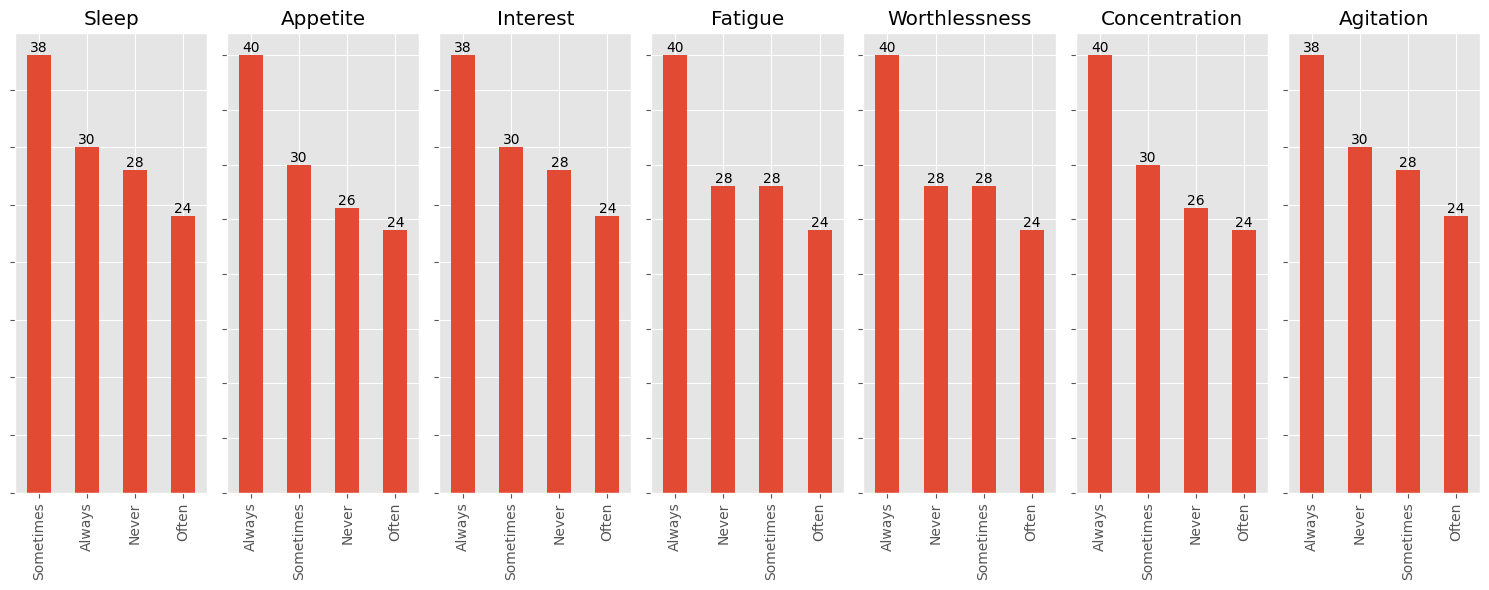

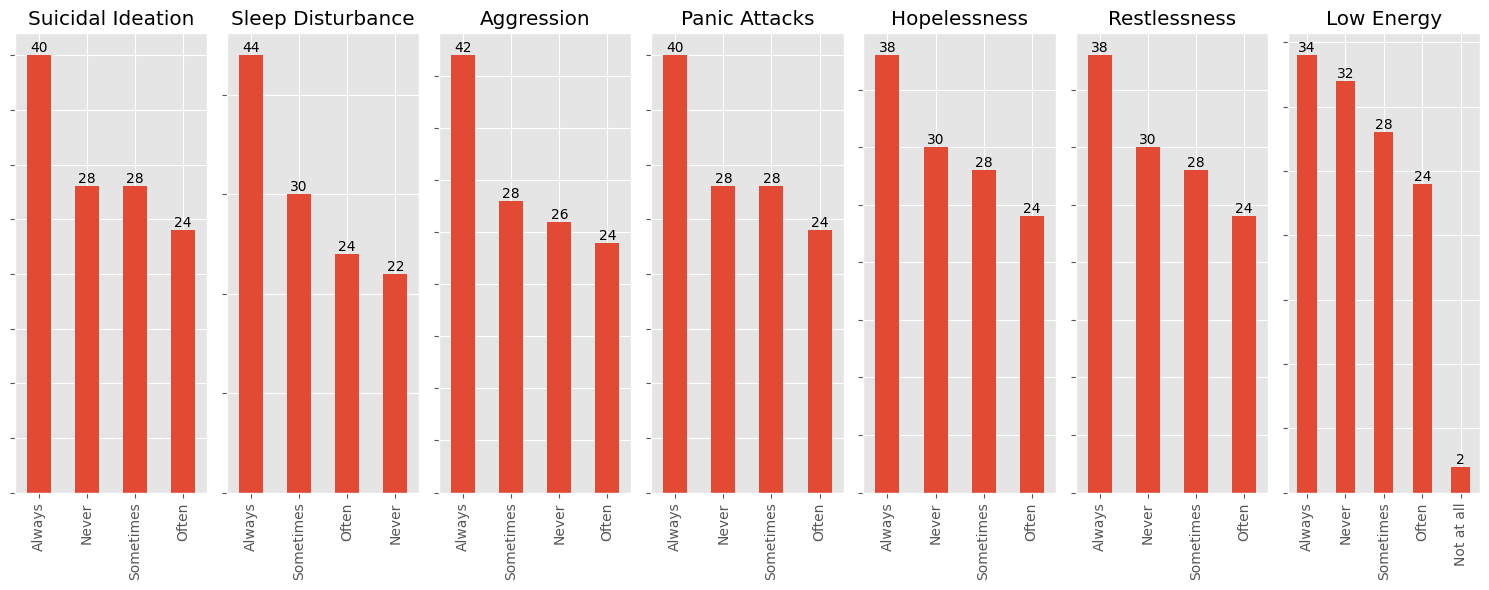

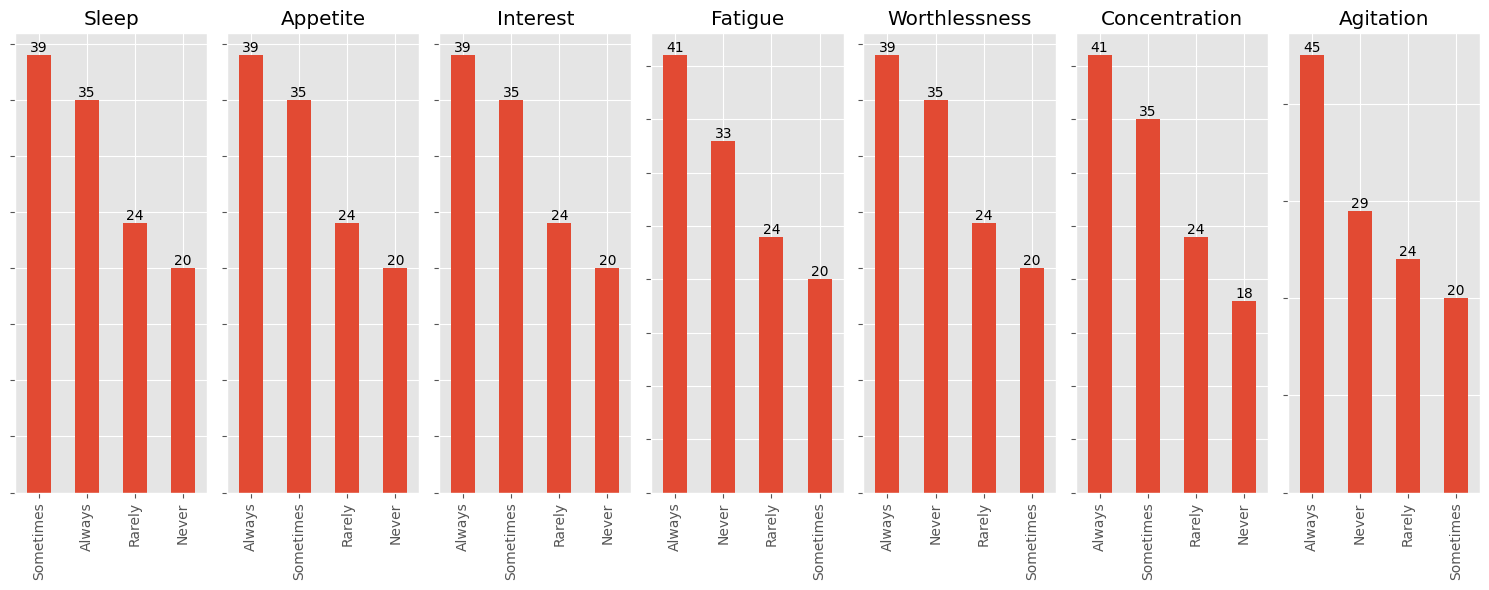

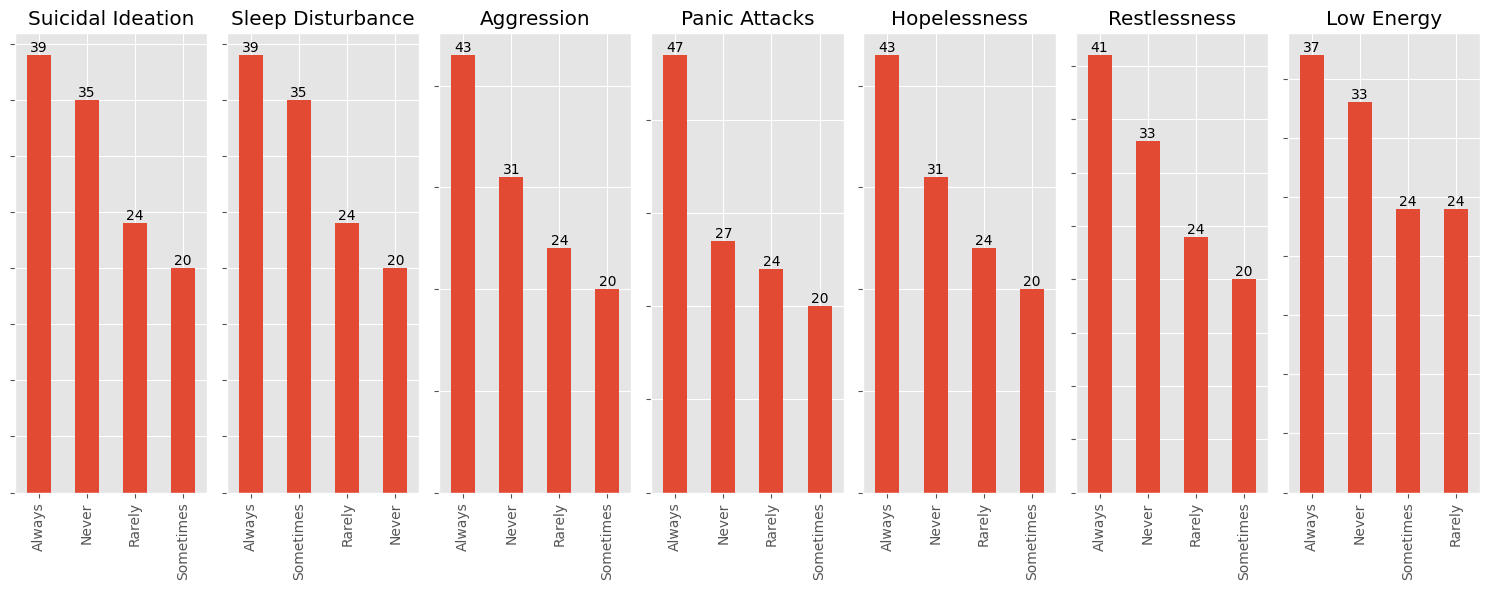

In [65]:
from IPython.core.display import display, HTML

for i in ["No depression", "Mild", "Moderate", "Severe"]:
    display(HTML("<h2>{}</h2>".format(i)))
    temp_df = original_df[original_df["Depression State"] == i]
    cols = original_df.columns[:-1]
    index = 0
    for j in range(2):
        fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(15, 6))
        for k in range(7):
            count = temp_df[cols[index]].value_counts()
            count.plot(kind="bar", ax=axes[k])
            for container in axes[k].containers:
                axes[k].bar_label(container)
            axes[k].set_yticklabels(())
            axes[k].set_ylabel("")
            axes[k].set_xlabel("")
            axes[k].set_title(cols[index])
            index += 1
        plt.tight_layout()
        plt.show()

In [66]:
for i in original_df.columns[:-1]:
    original_df[i] = original_df[i].map(reverse_annotation)

# Encoding depression states to train model

In [67]:
encode = {"No depression": 0, "Mild": 1,
         "Moderate": 2, "Severe": 3}

decode = ["No depression", "Mild", "Moderate", "Severe"]

original_df[original_df.columns[-1]] = original_df[original_df.columns[-1]].map(encode)

In [68]:
original_df.head()

,Sleep,Appetite,Interest,Fatigue,Worthlessness,Concentration,Agitation,Suicidal Ideation,Sleep Disturbance,Aggression,Panic Attacks,Hopelessness,Restlessness,Low Energy,Depression State
0,1,1,1,5,5,1,5,5,1,5,5,5,5,5,1
1,2,5,5,1,1,5,1,1,5,1,1,1,1,1,2
2,5,2,2,2,2,2,2,2,2,2,2,2,2,2,3
3,1,1,1,5,5,1,5,5,1,5,5,5,5,5,0
4,2,5,5,1,1,5,1,1,5,1,1,1,1,1,2


# Scaling values in the dataset

In [69]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [70]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, RobustScaler

sc_names = ["StandardScaler", "MinMaxScaler", "Normalizer", "RobustScaler"]
scs = [StandardScaler(), MinMaxScaler(), Normalizer(), RobustScaler()]

In [71]:
def training(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    score = accuracy_score(pred, y_test)
    report = classification_report(pred, y_test, output_dict=True)  # Set output_dict=True
    cm = confusion_matrix(pred, y_test)
    proba = model.predict_proba(x_test)
    return score*100, report, cm, pred, proba


# Training classic ML models and saving their performance

In [72]:
# Dictionary to store results
results = {}

# Loop through models
for model_name, model in zip(["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
                              "XGB", "LGBM", "Logistic Regression"],
                             [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
                              ExtraTreesClassifier(), XGBClassifier(), LGBMClassifier(),
                              LogisticRegression() ]):
    model_results = {"scores": [], "reports": {}, "cms": {}, "preds": {}, "probas": {}}

    for scaler_name, scaler in zip(sc_names, scs):
        x_scaled = scaler.fit_transform(original_df.iloc[:, :-1].values)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, original_df.iloc[:, -1].values,
                                                            random_state=42, test_size=0.2)
        score, report, cm, pred, proba = training(model, x_train, x_test, y_train, y_test)
        model_results["scores"].append(score)
        model_results["reports"][scaler_name] = report
        model_results["cms"][scaler_name] = cm
        model_results["preds"][scaler_name] = pred
        model_results["probas"][scaler_name] = proba

    results[model_name] = model_results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 94
[LightGBM] [Info] Number of data points in the train set: 432, number of used features: 14
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.514549
[LightGBM] [Info] Start training from score -1.473306
[LightGBM] [Info] Start training from score -1.525131
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [73]:
# Convert results to DataFrame for visualization
for model_name, model_result in results.items():
    df_scores = pd.DataFrame({"scores": model_result["scores"]}, index=sc_names)
    df_scores = df_scores.sort_values("scores", ascending=False)
    df_scores["scores"] = round(df_scores["scores"], 2)
    results[model_name]["scores_df"] = df_scores

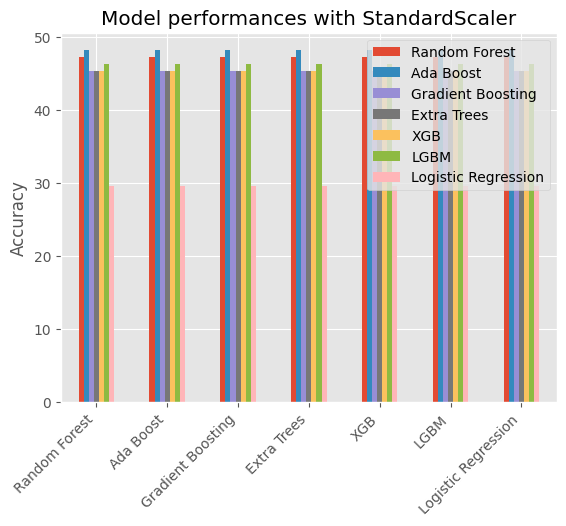

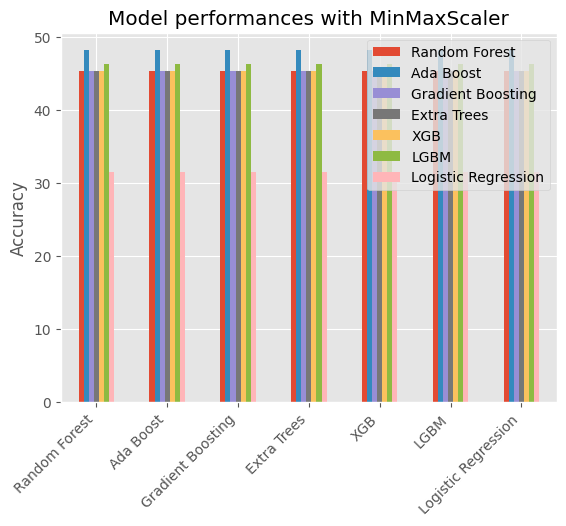

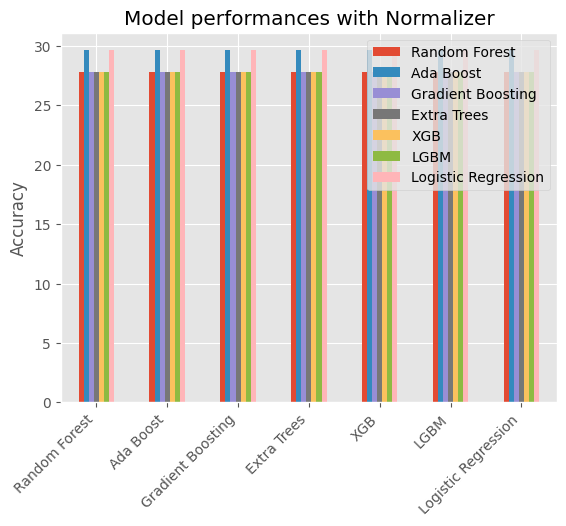

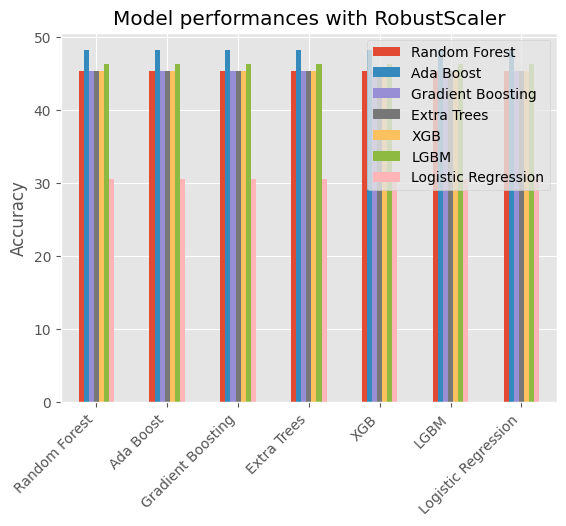

In [74]:
# Plot model performances
for scaler_name in sc_names:
    fig, axes = plt.subplots()
    scaler_results = {}
    model_names = []
    for model_name, model_result in results.items():
        scaler_scores = model_result["scores_df"].loc[scaler_name]
        model_names.append(model_name)
        scaler_results[model_name] = scaler_scores["scores"]
    scaler_results = pd.DataFrame(scaler_results, index=model_names)
    scaler_results.plot(kind='bar', ax=axes)
    axes.set_title(f"Model performances with {scaler_name}")
    axes.set_ylabel("Accuracy")
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45, ha='right')
    plt.show()

In [75]:
import pandas as pd

# Collect results
result_data = []

for scaler_name in sc_names:
    for model_name, model_result in results.items():
        scaler_reports = model_result["reports"][scaler_name]
        result_data.append([model_name, scaler_name,
                            scaler_reports['accuracy'],
                            scaler_reports['weighted avg']['precision'],
                            scaler_reports['weighted avg']['recall'],
                            scaler_reports['weighted avg']['f1-score']])

# Create DataFrame
df_result = pd.DataFrame(data=result_data, columns=["Classifier", "Scaler", "Accuracy", "Precision", "Recall", "F1-score"]).sort_values('Accuracy', ascending=False)
df_result.reset_index(drop=True, inplace=True)
df_result


,Classifier,Scaler,Accuracy,Precision,Recall,F1-score
0,Ada Boost,RobustScaler,0.481481,0.572340,0.481481,0.485213
1,Ada Boost,MinMaxScaler,0.481481,0.572340,0.481481,0.485213
2,Ada Boost,StandardScaler,0.481481,0.572340,0.481481,0.485213
3,Random Forest,StandardScaler,0.472222,0.595459,0.472222,0.488829
4,LGBM,StandardScaler,0.462963,0.697691,0.462963,0.474969
5,LGBM,RobustScaler,0.462963,0.697691,0.462963,0.474969
6,LGBM,MinMaxScaler,0.462963,0.697691,0.462963,0.474969
7,XGB,StandardScaler,0.453704,0.694444,0.453704,0.470340
8,Random Forest,MinMaxScaler,0.453704,0.596120,0.453704,0.470740
9,Extra Trees,StandardScaler,0.453704,0.694444,0.453704,0.470340


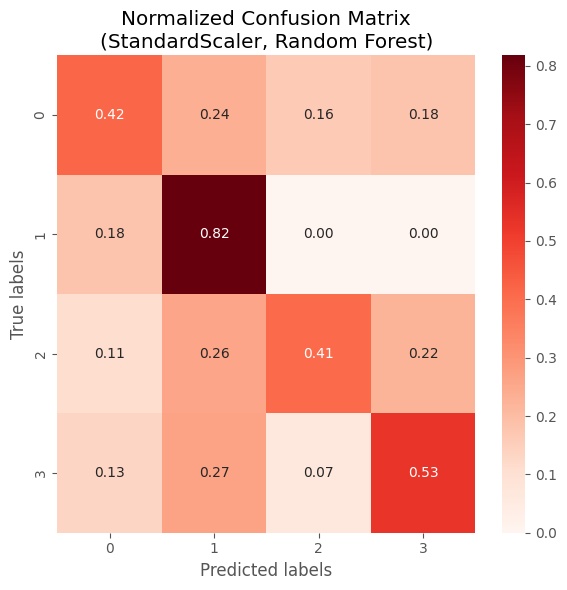

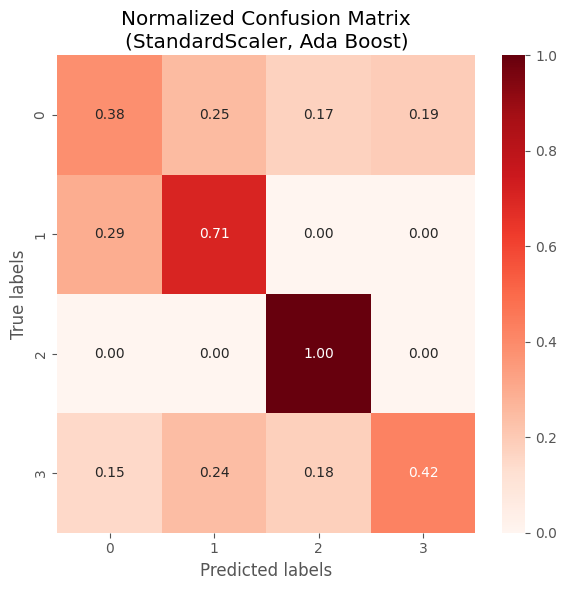

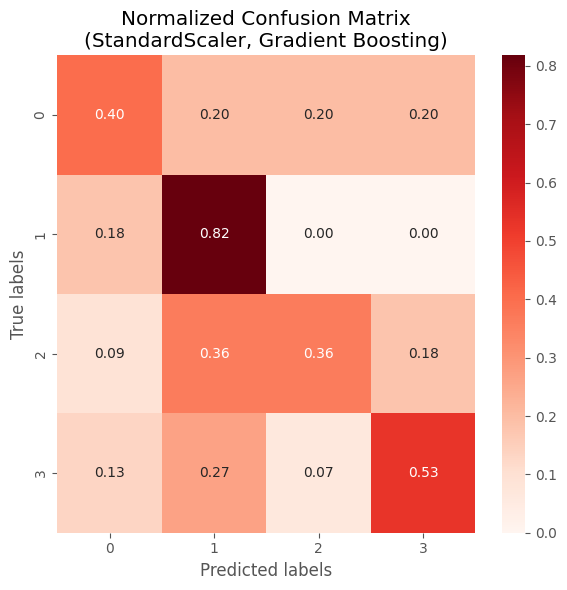

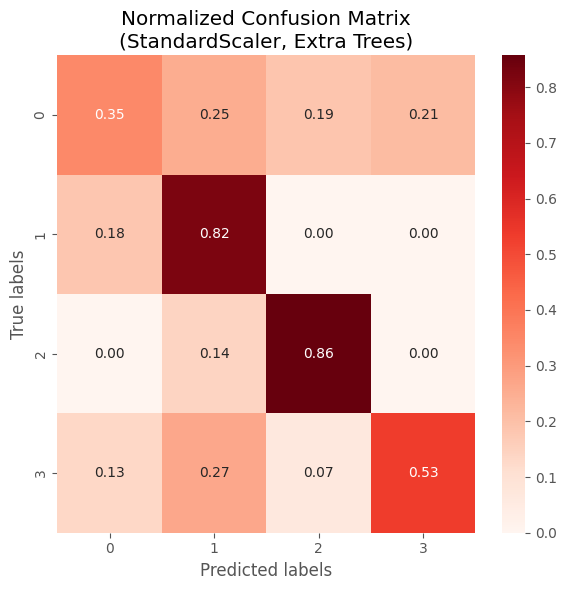

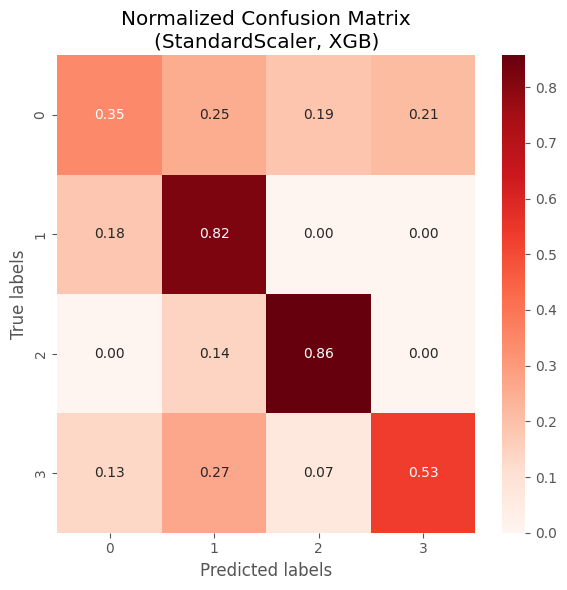

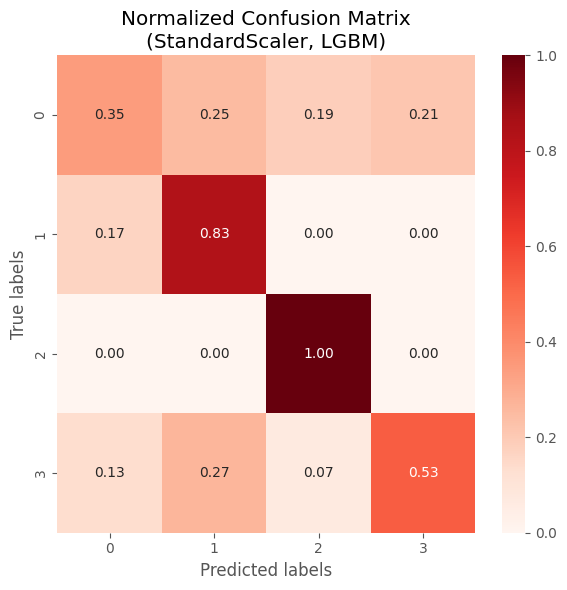

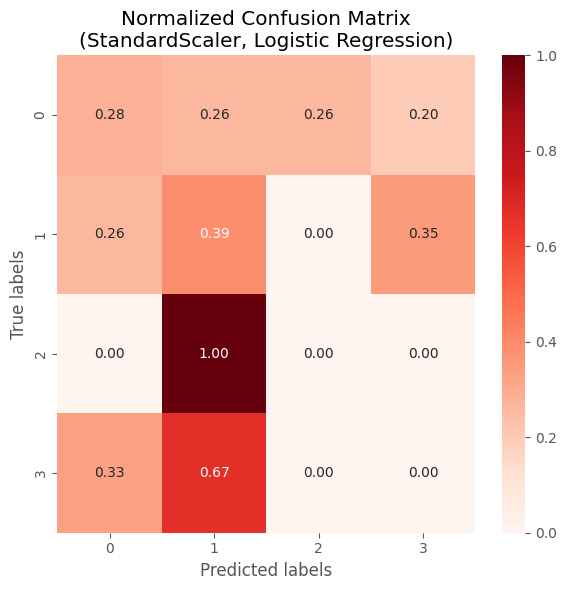

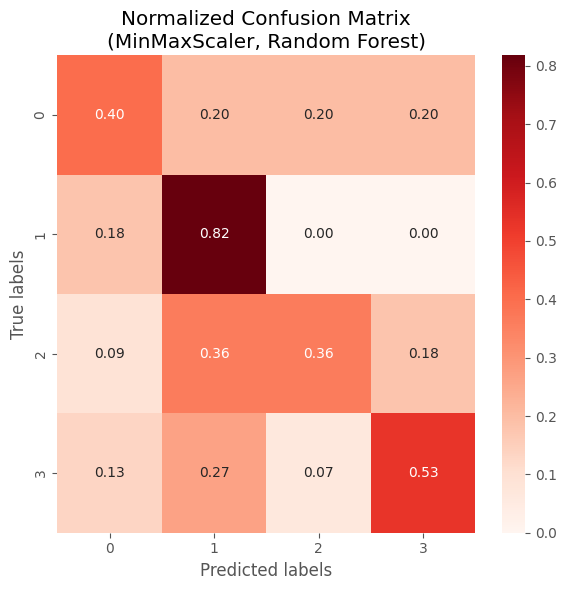

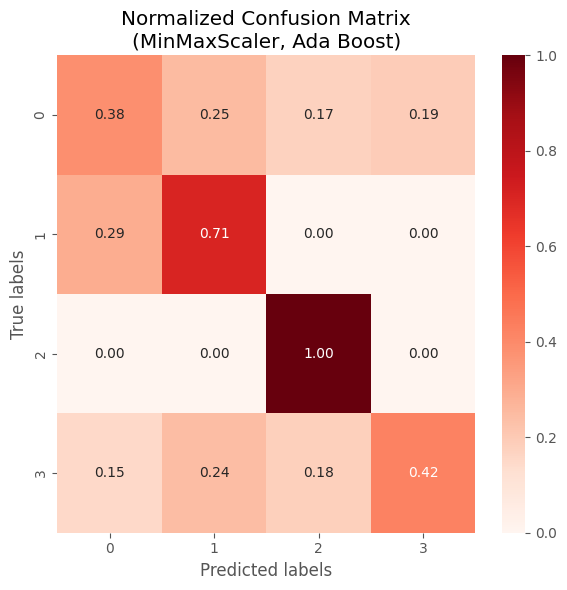

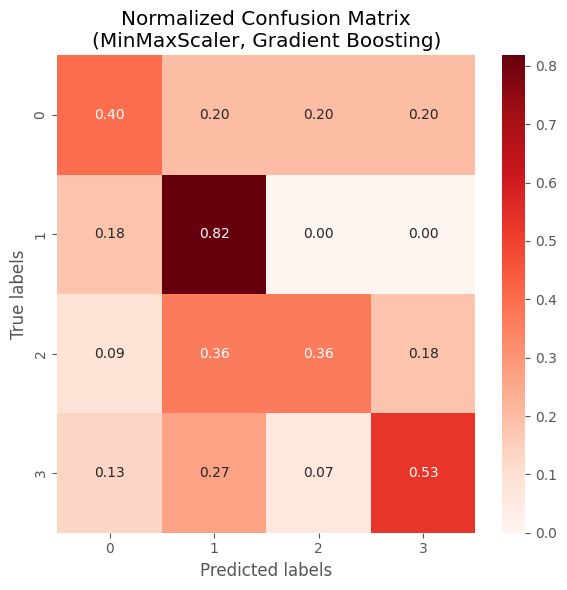

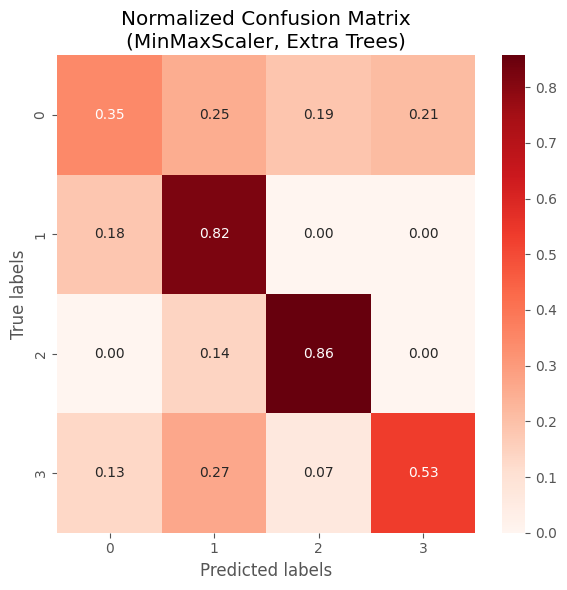

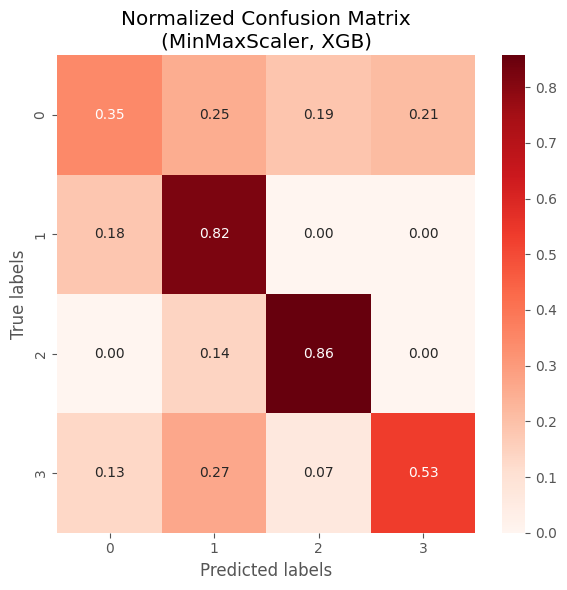

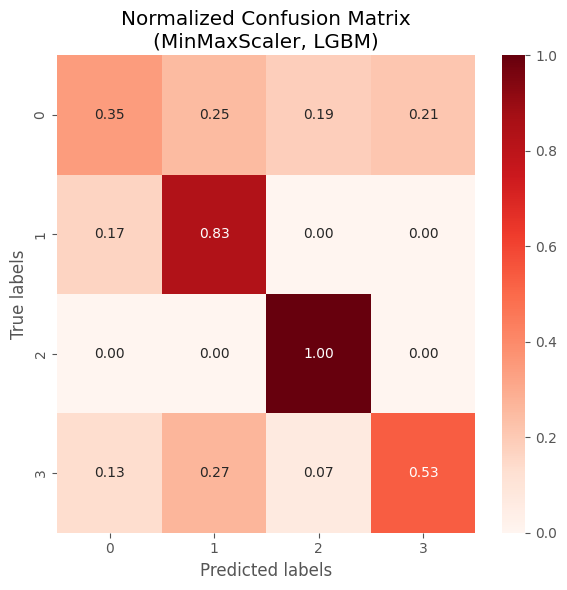

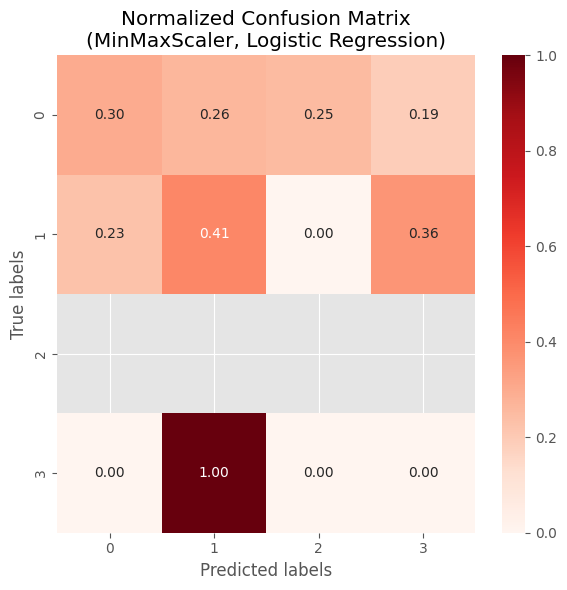

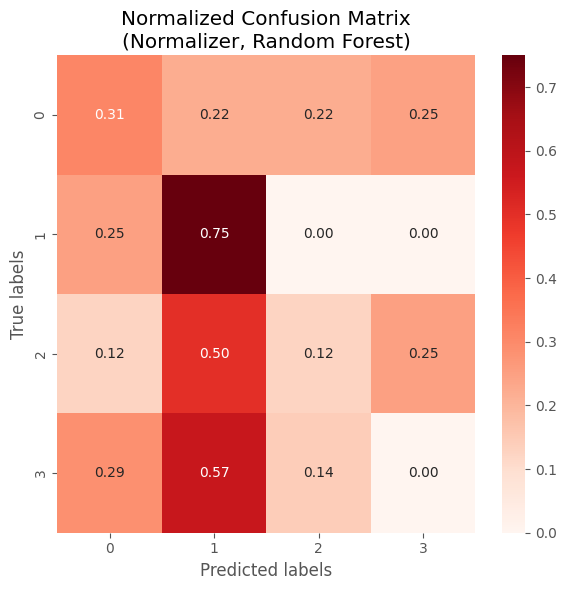

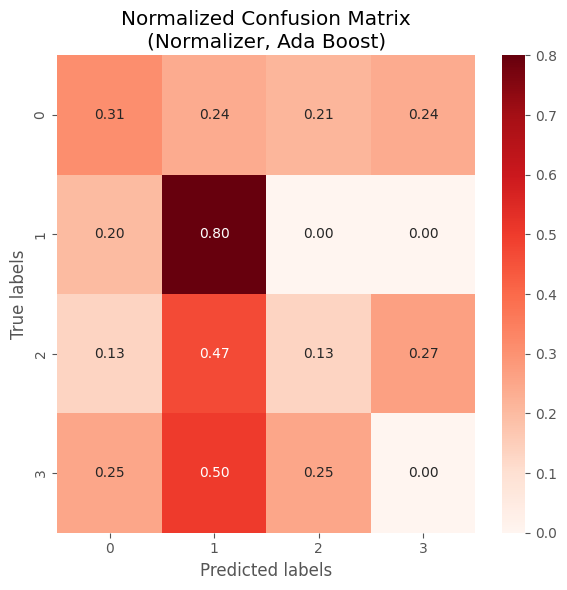

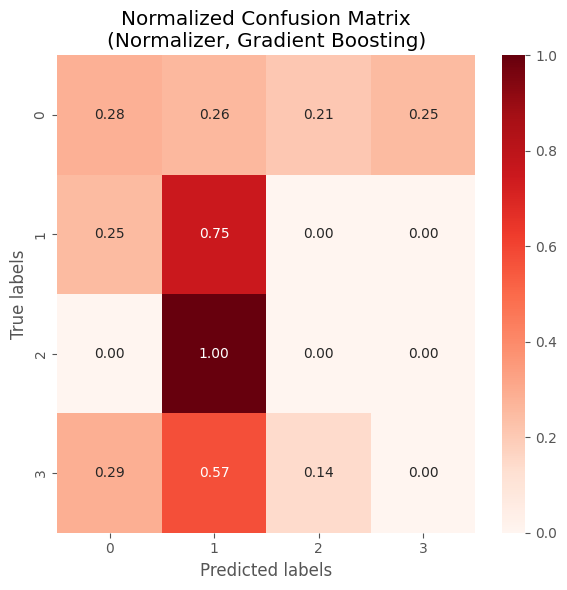

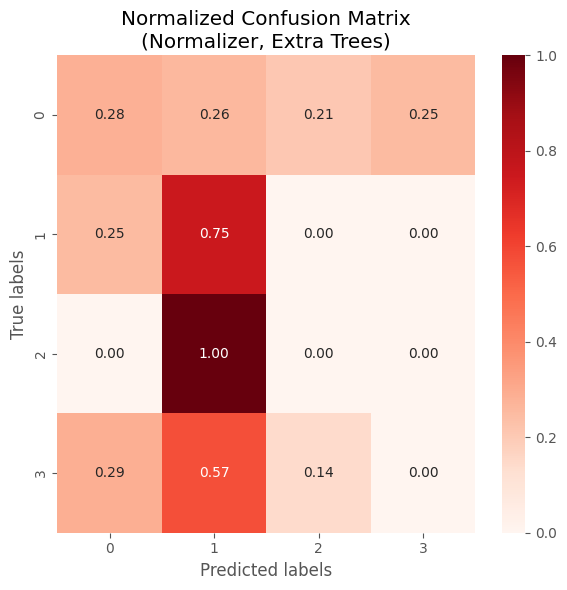

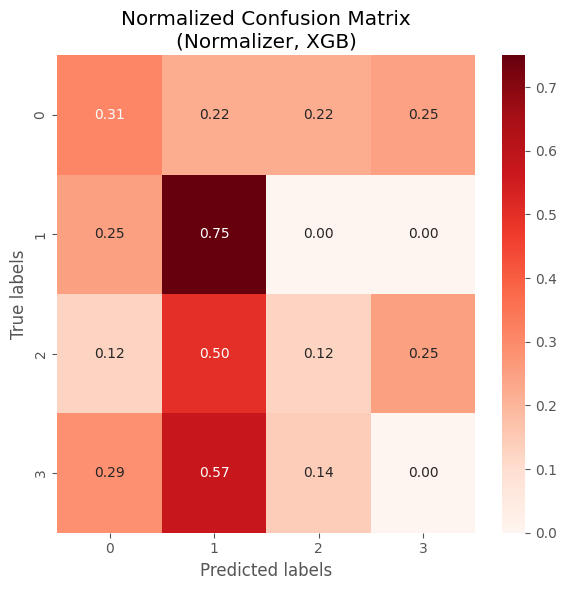

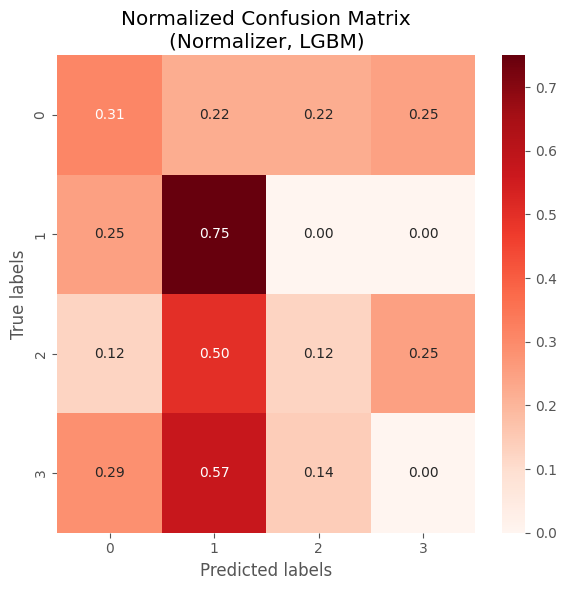

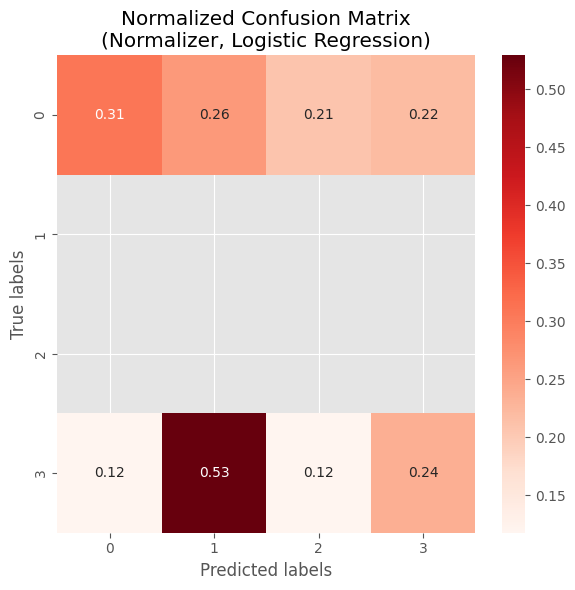

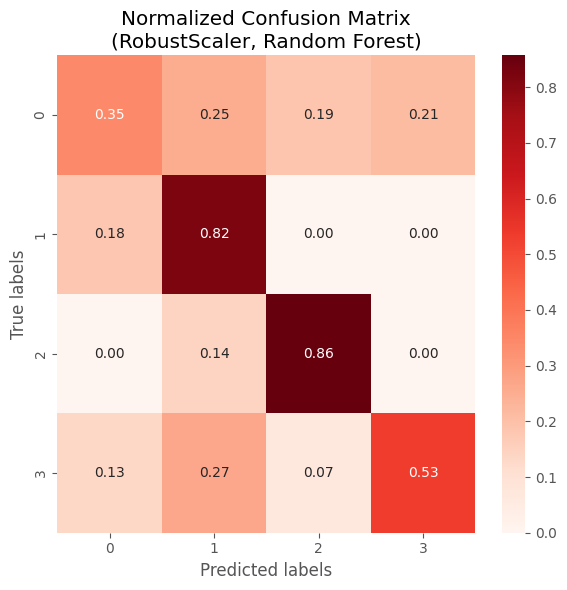

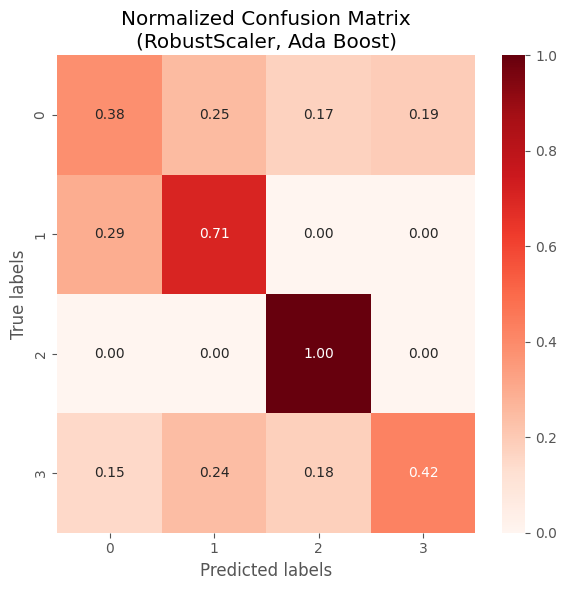

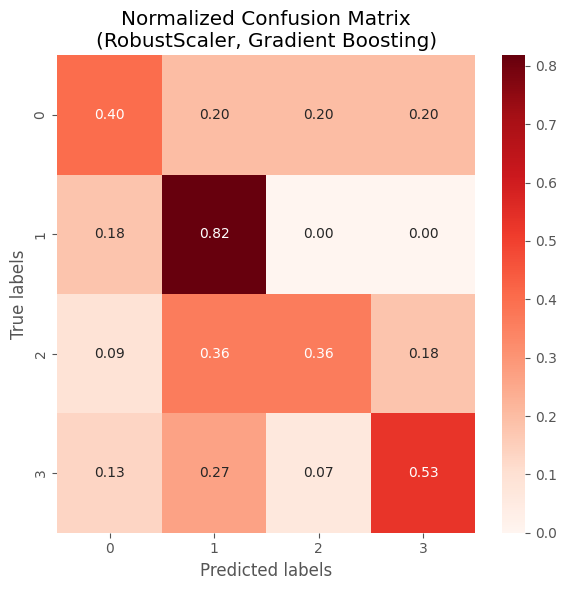

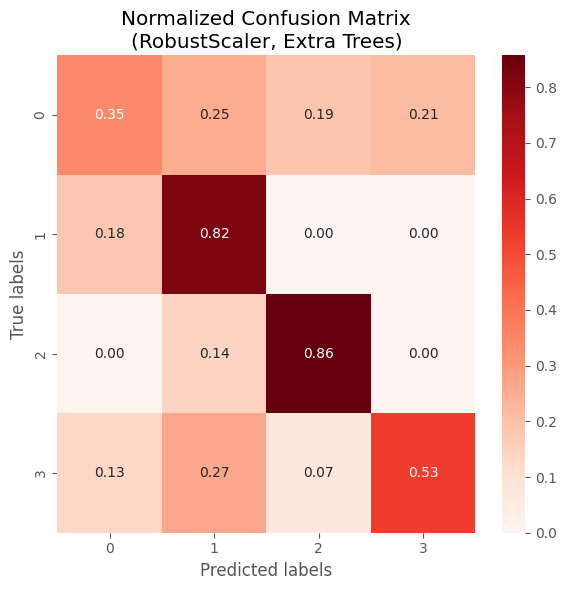

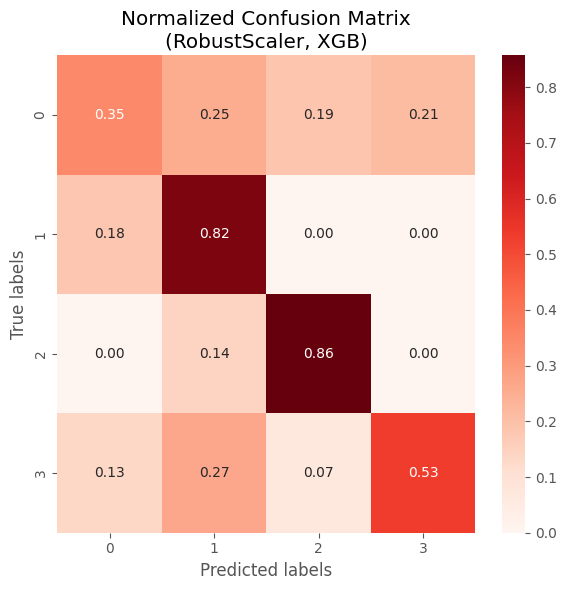

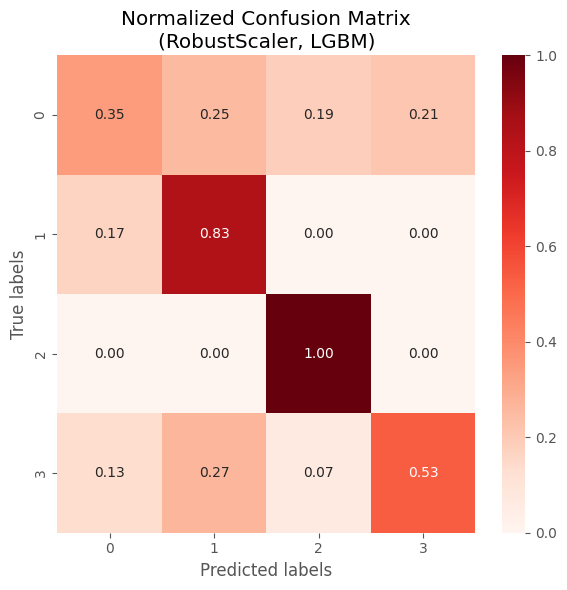

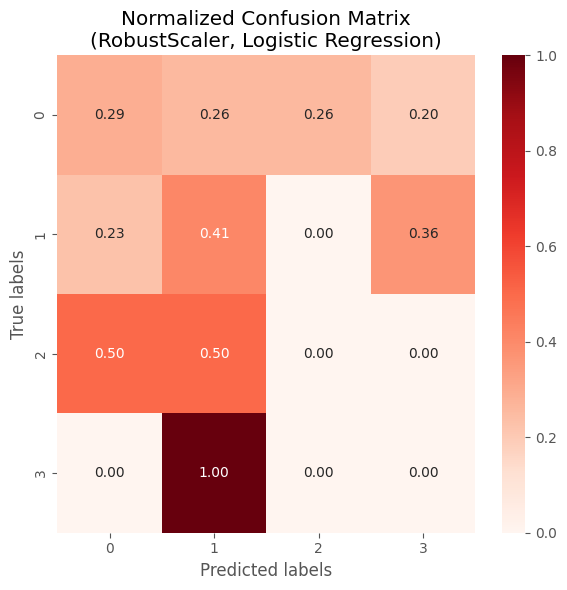

In [76]:
# Plot confusion matrix for each scaler and model
for scaler_name in sc_names:
    for model_name, model_result in results.items():
        fig, ax = plt.subplots(figsize=(6, 6))

        # Normalize confusion matrix
        cm_normalized = model_result["cms"][scaler_name] / model_result["cms"][scaler_name].sum(axis=1, keepdims=True)

        # Plot confusion matrix with red colormap
        sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Reds", ax=ax)
        ax.set_title(f"Normalized Confusion Matrix\n({scaler_name}, {model_name})")
        ax.set_xlabel('Predicted labels')
        ax.set_ylabel('True labels')

        plt.tight_layout()
        plt.show()


In [77]:
# Demo with predictions
for model_name, model in zip(["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
                              "XGB", "LGBM", "Logistic Regression"],
                             [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
                              ExtraTreesClassifier(), XGBClassifier(), LGBMClassifier(),
                              LogisticRegression() ]):
    for scaler_name, scaler in zip(sc_names, scs):
        x_scaled = scaler.fit_transform(original_df.iloc[:, :-1].values)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, original_df.iloc[:, -1].values,
                                                            random_state=42, test_size=0.2)
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        # Create a DataFrame to compare predictions and actual labels
        comparison_df = pd.DataFrame({'Predicted': predictions, 'Actual': y_test})

        print(f"Model: {model_name} | Scaler: {scaler_name}")
        print(comparison_df.head(10))  # Print the first 10 comparisons
        print("\n")

Model: Random Forest | Scaler: StandardScaler
   Predicted  Actual
0          0       0
1          0       0
2          3       2
3          2       2
4          3       3
5          0       0
6          3       2
7          1       1
8          3       3
9          2       1


Model: Random Forest | Scaler: MinMaxScaler
   Predicted  Actual
0          0       0
1          0       0
2          3       2
3          2       2
4          0       3
5          0       0
6          0       2
7          1       1
8          0       3
9          0       1


Model: Random Forest | Scaler: Normalizer
   Predicted  Actual
0          0       0
1          0       0
2          3       2
3          0       2
4          0       3
5          0       0
6          0       2
7          1       1
8          0       3
9          2       1


Model: Random Forest | Scaler: RobustScaler
   Predicted  Actual
0          0       0
1          0       0
2          3       2
3          2       2
4          0       3

In [85]:
# Generate a new sample with random values within the same range as the original data
def generate_fake_sample(original_df):
    new_sample = []
    for col in original_df.columns[:-1]:  # Exclude the label column
        min_val = original_df[col].min()
        max_val = original_df[col].max()
        new_sample.append(np.random.uniform(min_val, max_val))
    return np.array(new_sample).reshape(1, -1)

# Example original dataframe (replace this with your actual data)
original_df = pd.DataFrame({
    'Sleep': np.random.rand(540),
    'Appetite': np.random.rand(540),
    'Interest': np.random.rand(540),
    'Fatigue': np.random.rand(540),
    'Worthlessness': np.random.rand(540),
    'Concentration': np.random.rand(540),
    'Agitation': np.random.rand(540),
    'Suicidal Ideation': np.random.rand(540),
    'Sleep Disturbance': np.random.rand(540),
    'Aggression': np.random.rand(540),
    'Panic Attacks': np.random.rand(540),
    'Hopelessness': np.random.rand(540),
    'Restlessness': np.random.rand(540),
    'Low Energy': np.random.rand(540),
    'Depression State': np.random.choice(['No depression', 'Mild', 'Moderate', 'Severe'], 540)
})

# Encode Depression State
encode = {"No depression": 0, "Mild": 1, "Moderate": 2, "Severe": 3}
decode = ["No depression", "Mild", "Moderate", "Severe"]
original_df['Depression State'] = original_df['Depression State'].map(encode)


# Demo with predictions
# Demo with predictions
for model_name, model in zip(["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees",
                              "XGB", "Logistic Regression"],
                             [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(),
                              ExtraTreesClassifier(), XGBClassifier(),
                              LogisticRegression()]):
    for scaler_name, scaler in zip(sc_names, scs):
        x_scaled = scaler.fit_transform(original_df.iloc[:, :-1].values)
        x_train, x_test, y_train, y_test = train_test_split(x_scaled, original_df.iloc[:, -1].values,
                                                            random_state=42, test_size=0.2)
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        # Decode the predictions and ground truth labels for better readability
        decoded_predictions = [decode[pred] for pred in predictions]
        decoded_y_test = [decode[label] for label in y_test]

        # Create a DataFrame to compare predictions and actual labels
        comparison_df = pd.DataFrame({'Predicted': decoded_predictions, 'Actual': decoded_y_test})

        print(f"Model: {model_name} | Scaler: {scaler_name}")
        print(comparison_df.head(10))  # Print the first 10 comparisons

        # Generate a new fake sample
        new_sample = generate_fake_sample(original_df)
        new_sample_scaled = scaler.transform(new_sample)
        new_prediction = model.predict(new_sample_scaled)
        decoded_new_prediction = decode[new_prediction[0]]

        # Add the Depression State to the fake sample
        fake_sample_df = pd.DataFrame(new_sample, columns=original_df.columns[:-1])
        fake_sample_df['Predicted Depression State'] = decoded_new_prediction

        print(f"Fake New sample prediction for {model_name} with {scaler_name} scaler:")
        print(fake_sample_df)
        print("\n")



Model: Random Forest | Scaler: StandardScaler
       Predicted         Actual
0           Mild           Mild
1         Severe         Severe
2         Severe  No depression
3           Mild         Severe
4         Severe         Severe
5  No depression           Mild
6           Mild       Moderate
7  No depression       Moderate
8           Mild  No depression
9           Mild  No depression
Fake New sample prediction for Random Forest with StandardScaler scaler:
      Sleep  Appetite  Interest   Fatigue  Worthlessness  Concentration  \
0  0.575487  0.838053  0.580255  0.625238       0.831591       0.283288   

   Agitation  Suicidal Ideation  Sleep Disturbance  Aggression  Panic Attacks  \
0   0.594887           0.205608           0.188345    0.138256       0.075012   

   Hopelessness  Restlessness  Low Energy Predicted Depression State  
0      0.661759      0.140394    0.781627              No depression  


Model: Random Forest | Scaler: MinMaxScaler
       Predicted         Ac